<a href="https://colab.research.google.com/github/Luchinps/Coderhouse-DC/blob/main/Trabajo_CoderHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El Dataset

El dataset esta conformado por diferentes alimentos y sus bases nutricionales como vitaminas, grasas, proteínas,etc.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score



In [74]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TP_FINAL_CD/Food.csv', sep = ';')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Description  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
0               BUTTER,WITH SALT       717.0         0.85          81.11   
1         BUTTER,WHIPPED,W/ SALT       718.0         0.49          78.30   
2           BUTTER OIL,ANHYDROUS       876.0         0.28          99.48   
3                    CHEESE,BLUE       353.0        21.40          28.74   
4                   CHEESE,BRICK       371.0        23.24          29.68   
...                          ...         ...          ...            ...   
8785             MACKEREL,SALTED       305.0        18.50          25.10   
8786  SCALLOP,(BAY&SEA),CKD,STMD       111.0        20.54           0.84   
8787                  SYRUP,CANE       269.0         0.00           0.00   
8788                   SNAIL,RAW        90.0        16.10           1.40   
8789            TURTLE,GREEN,RAW        89.0        19.80           0.50   

      Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  Sodium_(mg)  \
0               0.06           0.0           0.06          24.0        643.0   
1               2.87           0.0           0.06          23.0        583.0   
2               0.00           0.0           0.00           4.0          2.0   
3               2.34           0.0           0.50         528.0       1146.0   
4               2.79           0.0           0.51         674.0        560.0   
...              ...           ...            ...           ...          ...   
8785            0.00           0.0           0.00          66.0       4450.0   
8786            5.41           0.0           0.00          10.0        667.0   
8787           73.14           0.0          73.20          13.0         58.0   
8788            2.00           0.0           0.00          10.0         70.0   
8789            0.00           0.0           0.00         118.0         68.0   

      Zinc_(mg)  ...  Vit_D_IU  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  \
0          0.09  ...       0.0         7.0      51.368       21.021   
1          0.05  ...       0.0         4.6      45.390       19.874   
2          0.01  ...       0.0         8.6      61.924       28.732   
3          2.66  ...      21.0         2.4      18.669        7.778   
4          2.60  ...      22.0         2.5      18.764        8.598   
...         ...  ...       ...         ...         ...          ...   
8785       1.10  ...    1006.0         7.8       7.148        8.320   
8786       1.55  ...       2.0         0.0       0.218        0.082   
8787       0.19  ...       0.0         0.0       0.000        0.000   
8788       1.00  ...       0.0         0.1       0.361        0.259   
8789       1.00  ...       0.0         0.1       0.127        0.088   

      FA_Poly_(g)  Cholestrl_(mg)  GmWt_1                          GmWt_Desc1  \
0           3.043           215.0    5.00          1 pat,  (1" sq, 1/3" high)   
1           3.331           225.0    3.80          1 pat,  (1" sq, 1/3" high)   
2           3.694           256.0   12.80                              1 tbsp   
3           0.800            75.0   28.35                                1 oz   
4           0.784            94.0  132.00                        1 cup, diced   
...           ...             ...     ...                                 ...   
8785        6.210            95.0   80.00  1 piece,  (5-1/2" x 1-1/2" x 1/2")   
8786        0.222            41.0   85.00                                3 oz   
8787        0.000             0.0   21.00                           1 serving   
8788        0.252            50.0   85.00                                3 oz   
8789        0.170            50.0   85.00                                3 oz   

      GmWt_2              GmWt_Desc2  
0       14.2                  1 tbsp  
1        9.4                  1 tbsp  
2      205.0                   1 cup  
3       17.0            1 cubic inch  
4      113.0         1 cup, shredded  
...      ...                     ...  
8785    17.0  1 cubic inch, boneless  
8786     

In [75]:
for x in df.columns:
  print(x)

Description
Energ_Kcal
Protein_(g)
Lipid_Tot_(g)
Carbohydrt_(g)
Fiber_TD_(g)
Sugar_Tot_(g)
Calcium_(mg)
Sodium_(mg)
Zinc_(mg)
Manganese_(mg)
Selenium_(µg)
Vit_C_(mg)
Niacin_(mg)
Vit_B6_(mg)
Vit_B12_(µg)
Vit_A_IU
Retinol_(µg)
Vit_E_(mg)
Vit_D_IU
Vit_K_(µg)
FA_Sat_(g)
FA_Mono_(g)
FA_Poly_(g)
Cholestrl_(mg)
GmWt_1
GmWt_Desc1
GmWt_2
GmWt_Desc2


Description: Una breve descripción del alimento.

Energ_Kcal: La cantidad de energía que hay en el alimento.

Protein_(g), Lipid_Tot_(g), Carbohydrt_(g), Fiber_TD_(g), Sugar_Tot_(g), Calcium_(mg), Sodium_(mg), Zinc_(mg), Manganese_(mg), Selenium_(µg), Vit_C_(mg), Niacin_(mg), Vit_B6_(mg), Vit_B12_(µg), Vit_A_IU, Retinol_(µg), Vit_E_(mg), Vit_D_IU, Vit_K_(µg), Cholestrl_(mg): La cantidad de _ que hay en el alimento.

FA_Sat_(g): La cantidad de grasas saturadas.

FA_Mono_(g): La cantidad de grasas monoinsaturadas.

FA_Poly_(g): La cantidad de grasas poliinsaturadas.

GmWt_1: El peso de la primera medida estándar de la porción del alimento en gramos.

GmWt_Desc1: Descripción de la primera porción estándar, el tipo de medida o porción, como "1 oz", "1 cup", o "1 slice".

GmWt_2: Es un peso alternativo para el alimento, si se mide en una porción diferente (en gramos).

GmWt_Desc2: Descripción de la segunda porción estándar, con una medida alternativa para el alimento, como "1 cup", "1 tbsp", "1 slice".

Podemos observar que las unidades no estan iguales, por eso voy a pasar todo a **gr** para no generar confusiones.

In [76]:
#Columnas a convertir de microgramos a gramos
cols_ug_to_gr = [df.columns[11],df.columns[15],df.columns[16], df.columns[17], df.columns[20]]

#Columnas a convertir de miligramos a gramos
cols_mg_to_gr = [df.columns[7],df.columns[8], df.columns[9], df.columns[10], df.columns[12], df.columns[13], df.columns[14], df.columns[18], df.columns[19], df.columns[24]]

#Columnas a renombrar de g a gr
cols_g_to_gr = [df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[21], df.columns[22], df.columns[23]]

#Convertir de microgramos (µg) a gramos (gr)
for col in cols_ug_to_gr:
    df[col] = (df[col]/1000000)
    df.rename(columns={col: col.replace('(µg)', '(gr)')}, inplace=True)

#Convertir de miligramos (mg) a gramos (gr)
for col in cols_mg_to_gr:
    df[col] = (df[col]/1000)
    df.rename(columns={col: col.replace('(mg)', '(gr)')}, inplace=True)

#Renombrar de g a gr
for col in cols_g_to_gr:
    df.rename(columns={col: col.replace('(g)', '(gr)')}, inplace=True)

df.columns

Index(['Description', 'Energ_Kcal', 'Protein_(gr)', 'Lipid_Tot_(gr)',
       'Carbohydrt_(gr)', 'Fiber_TD_(gr)', 'Sugar_Tot_(gr)', 'Calcium_(gr)',
       'Sodium_(gr)', 'Zinc_(gr)', 'Manganese_(gr)', 'Selenium_(gr)',
       'Vit_C_(gr)', 'Niacin_(gr)', 'Vit_B6_(gr)', 'Vit_B12_(gr)', 'Vit_A_IU',
       'Retinol_(gr)', 'Vit_E_(gr)', 'Vit_D_IU', 'Vit_K_(gr)', 'FA_Sat_(gr)',
       'FA_Mono_(gr)', 'FA_Poly_(gr)', 'Cholestrl_(gr)', 'GmWt_1',
       'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2'],
      dtype='object')

In [77]:
for col in df.columns:
  nulos = np.where(df[col].isna(),1,0).sum()
  print(f'{col} tiene {nulos} valores nulos')

Description tiene 0 valores nulos
Energ_Kcal tiene 30 valores nulos
Protein_(gr) tiene 30 valores nulos
Lipid_Tot_(gr) tiene 30 valores nulos
Carbohydrt_(gr) tiene 30 valores nulos
Fiber_TD_(gr) tiene 615 valores nulos
Sugar_Tot_(gr) tiene 1852 valores nulos
Calcium_(gr) tiene 378 valores nulos
Sodium_(gr) tiene 113 valores nulos
Zinc_(gr) tiene 736 valores nulos
Manganese_(gr) tiene 2190 valores nulos
Selenium_(gr) tiene 1725 valores nulos
Vit_C_(gr) tiene 848 valores nulos
Niacin_(gr) tiene 667 valores nulos
Vit_B6_(gr) tiene 933 valores nulos
Vit_B12_(gr) tiene 1223 valores nulos
Vit_A_IU tiene 737 valores nulos
Retinol_(gr) tiene 1825 valores nulos
Vit_E_(gr) tiene 2905 valores nulos
Vit_D_IU tiene 3225 valores nulos
Vit_K_(gr) tiene 3578 valores nulos
FA_Sat_(gr) tiene 379 valores nulos
FA_Mono_(gr) tiene 696 valores nulos
FA_Poly_(gr) tiene 695 valores nulos
Cholestrl_(gr) tiene 440 valores nulos
GmWt_1 tiene 330 valores nulos
GmWt_Desc1 tiene 329 valores nulos
GmWt_2 tiene 3966 

In [78]:
# Creo una nueva columna priorizando 'GmWt_1' usando 'GmWt_2' si 'GmWt_1' esta vacio
df['Peso(gr)'] = df['GmWt_1'].fillna(df['GmWt_2'])

# Mostramos las primeras filas para verificar el resultado
print(df[['Description', 'GmWt_1', 'GmWt_2', 'Peso(gr)']].head())


              Description  GmWt_1  GmWt_2  Peso(gr)
0        BUTTER,WITH SALT    5.00    14.2      5.00
1  BUTTER,WHIPPED,W/ SALT    3.80     9.4      3.80
2    BUTTER OIL,ANHYDROUS   12.80   205.0     12.80
3             CHEESE,BLUE   28.35    17.0     28.35
4            CHEESE,BRICK  132.00   113.0    132.00


In [79]:
df.drop(columns=['GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2'], inplace=True)

In [80]:
# Calcula la media por columna ignorando los NaN
medias = df.iloc[:, 1:].mean()

# Aplica el fillna a cada columna con su respectiva media
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(medias[x.name]))

df

Description  Energ_Kcal  Protein_(gr)  Lipid_Tot_(gr)  \
0               BUTTER,WITH SALT       717.0          0.85           81.11   
1         BUTTER,WHIPPED,W/ SALT       718.0          0.49           78.30   
2           BUTTER OIL,ANHYDROUS       876.0          0.28           99.48   
3                    CHEESE,BLUE       353.0         21.40           28.74   
4                   CHEESE,BRICK       371.0         23.24           29.68   
...                          ...         ...           ...             ...   
8785             MACKEREL,SALTED       305.0         18.50           25.10   
8786  SCALLOP,(BAY&SEA),CKD,STMD       111.0         20.54            0.84   
8787                  SYRUP,CANE       269.0          0.00            0.00   
8788                   SNAIL,RAW        90.0         16.10            1.40   
8789            TURTLE,GREEN,RAW        89.0         19.80            0.50   

      Carbohydrt_(gr)  Fiber_TD_(gr)  Sugar_Tot_(gr)  Calcium_(gr)  \
0                0.06            0.0            0.06         0.024   
1                2.87            0.0            0.06         0.023   
2                0.00            0.0            0.00         0.004   
3                2.34            0.0            0.50         0.528   
4                2.79            0.0            0.51         0.674   
...               ...            ...             ...           ...   
8785             0.00            0.0            0.00         0.066   
8786             5.41            0.0            0.00         0.010   
8787            73.14            0.0           73.20         0.013   
8788             2.00            0.0            0.00         0.010   
8789             0.00            0.0            0.00         0.118   

      Sodium_(gr)  Zinc_(gr)  ...  Vit_A_IU  Retinol_(gr)  Vit_E_(gr)  \
0           0.643    0.00009  ...  0.002499      0.000671     0.00232   
1           0.583    0.00005  ...  0.002468      0.000671     0.00137   
2           0.002    0.00001  ...  0.003069      0.000824     0.00280   
3           1.146    0.00266  ...  0.000721      0.000192     0.00025   
4           0.560    0.00260  ...  0.001080      0.000286     0.00026   
...           ...        ...  ...       ...           ...         ...   
8785        4.450    0.00110  ...  0.000157      0.000047     0.00238   
8786        0.667    0.00155  ...  0.000005      0.000002     0.00000   
8787        0.058    0.00019  ...  0.000000      0.000000     0.00000   
8788        0.070    0.00100  ...  0.000100      0.000030     0.00500   
8789        0.068    0.00100  ...  0.000100      0.000030     0.00050   

      Vit_D_IU    Vit_K_(gr)  FA_Sat_(gr)  FA_Mono_(gr)  FA_Poly_(gr)  \
0        0.000  7.000000e-06       51.368        21.021         3.043   
1        0.000  4.600000e-06       45.390        19.874         3.331   
2        0.000  8.600000e-06       61.924        28.732         3.694   
3        0.021  2.400000e-06       18.669         7.778         0.800   
4        0.022  2.500000e-06       18.764         8.598         0.784   
...        ...           ...          ...           ...           ...   
8785     1.006  7.800000e-06        7.148         8.320         6.210   
8786     0.002  0.000000e+00        0.218         0.082         0.222   
8787     0.000  0.000000e+00        0.000         0.000         0.000   
8788     0.000  1.000000e-07        0.361         0.259         0.252   
8789     0.000  1.000000e-07        0.127         0.088         0.170   

      Cholestrl_(gr)  Peso(gr)  
0              0.215      5.00  
1              0.225      3.80  
2              0.256     12.80  
3              0.075     28.35  
4              0.094    132.00  
...              ...       ...  
8785           0.095     80.00  
8786           0.041     85.00  
8787           0.000     21.00  
8788           0.050     85.00  
8789           0.050     85.00  

[8790 rows x 26 columns]

Use la media para rellenar los nulos porque, en mis datos que tengo proteínas y nutrientes, la media es un número más representativo del comportamiento general de los alimentos. Rellenar con 0 en este caso podría introducir sesgos o distorsionar mi análisis, ya que valores como 0 en columnas nutricionales no son naturales y afectarían las métricas y los resultados del modelo.

Para mi dataset, voy a querer analizar y luego categorizar si un alimento es **alto o no** en proteínas, para ello primero tengo que entender que es que un alimento sea alto en proteínas y como eso se regula según el CAA. Según el CAA, para que un alimento sea categorizado como "alto en proteínas" tiene que tener al menos el 20% del valor energético total provienente de proteínas.

Esto lo calculamos de la siguiente manera:

$$\text{Porcentaje de calorías de proteínas} = \left( \frac{\text{Proteínas (gr)} \times 4}{\text{Calorías Totales}} \right) \times 100
$$

<Axes: xlabel='Porcentaje_cal_prot', ylabel='Density'>

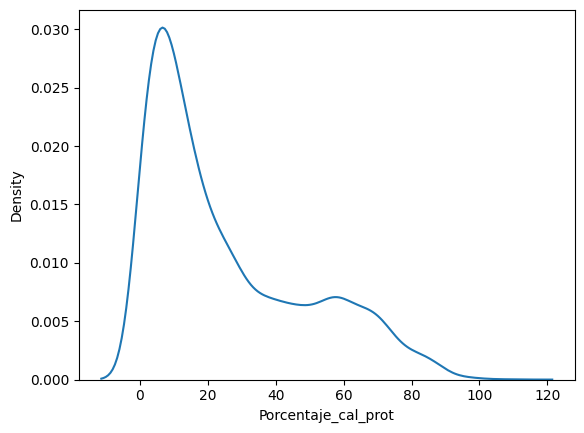

In [81]:
df['Porcentaje_cal_prot'] = (df['Protein_(gr)'] * 4 / df['Energ_Kcal']) * 100
sns.kdeplot(df['Porcentaje_cal_prot'])

In [82]:
df_mayor_a_100 = df[(df['Energ_Kcal'] != 0) & (df['Porcentaje_cal_prot'] > 100)]
df_mayor_a_100

Description  Energ_Kcal  Protein_(gr)  Lipid_Tot_(gr)  \
4858       SOY PROTEIN ISOLATE       335.0         88.32            3.39   
5009   SOY PROT ISOLATE,K TYPE       321.0         88.32            0.53   
6204  GELATINS,DRY PDR,UNSWTND       335.0         85.60            0.10   

      Carbohydrt_(gr)  Fiber_TD_(gr)  Sugar_Tot_(gr)  Calcium_(gr)  \
4858             0.00            0.0             0.0         0.178   
5009             2.59            0.0             0.0         0.178   
6204             0.00            0.0             0.0         0.055   

      Sodium_(gr)  Zinc_(gr)  ...  Retinol_(gr)  Vit_E_(gr)  Vit_D_IU  \
4858        1.005    0.00403  ...           0.0         0.0       0.0   
5009        0.050    0.00403  ...           0.0         0.0       0.0   
6204        0.196    0.00014  ...           0.0         0.0       0.0   

      Vit_K_(gr)  FA_Sat_(gr)  FA_Mono_(gr)  FA_Poly_(gr)  Cholestrl_(gr)  \
4858         0.0        0.422         0.645         1.648             0.0   
5009         0.0        0.077         0.117         0.299             0.0   
6204         0.0        0.070         0.060         0.010             0.0   

      Peso(gr)  Porcentaje_cal_prot  
4858     28.35           105.456716  
5009     28.35           110.056075  
6204      7.00           102.208955  

[3 rows x 27 columns]

Algunos productos como las proteínas en polvo y la gelatina en polvo muestran un porcentaje de calorías provenientes de proteínas superior al 100%. Esto puede explicarse por la alta concentración de proteínas en estos productos, junto con posibles desajustes o redondeos en los valores nutricionales reportados. Por lo tanto, estos valores no indican un error grave, sino una característica común de productos altamente procesados con poco o nulo contenido de grasas y carbohidratos.

In [83]:
df['Alto_en_prot'] = np.where(df['Porcentaje_cal_prot'] >= 20, 1, 0)

# Gráficos

**Primera pregunta:**


¿Cómo se distribuyen las calorías en función del contenido de grasas totales?


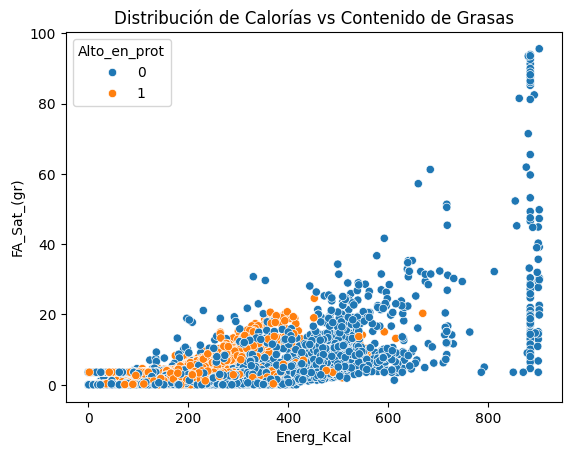

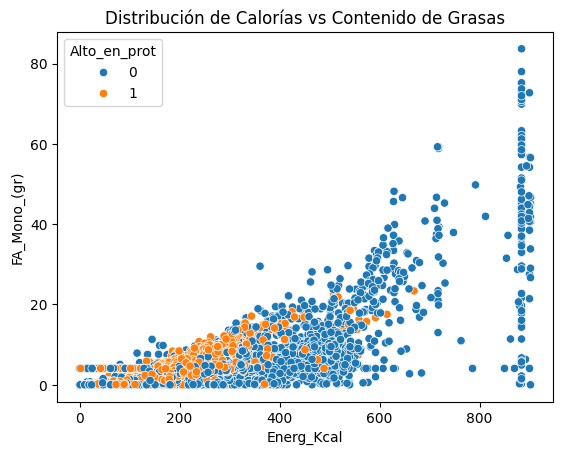

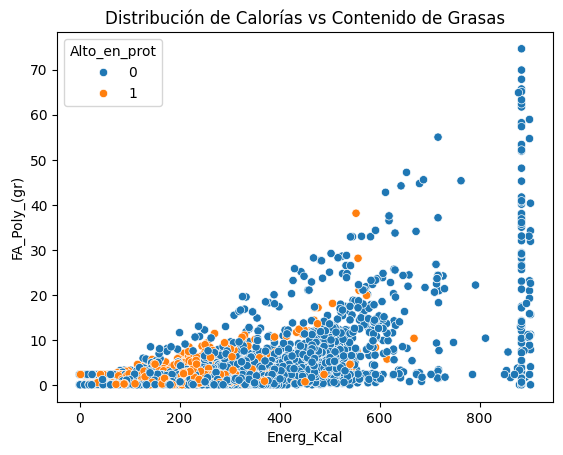

In [84]:
columns = ['FA_Sat_(gr)', 'FA_Mono_(gr)', 'FA_Poly_(gr)']
for col in columns:
  sns.scatterplot(x=df['Energ_Kcal'], y = df[col], hue = df['Alto_en_prot'])
  plt.title('Distribución de Calorías vs Contenido de Grasas')
  plt.ylabel('Energía (kcal)')
  plt.ylabel(f'{col}')
  plt.show()

**Segunda pregunta**

¿Como se distribuyen las calorias en funcion de si son altas o no en proteinas?

<ipython-input-85-fa1c229cce40>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Energ_Kcal', hue='Alto_en_prot', shade=True)


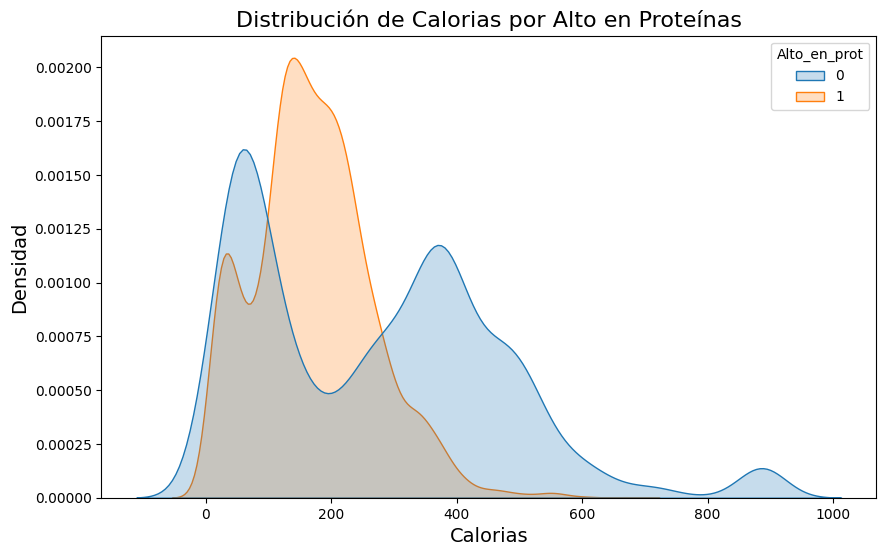

In [85]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Energ_Kcal', hue='Alto_en_prot', shade=True)

# Configurar el título y las etiquetas
plt.title('Distribución de Calorias por Alto en Proteínas', fontsize=16)
plt.xlabel('Calorias', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Mostrar el gráfico
plt.show()

**Tercera pregunta**

¿Cómo se relacionan el contenido de fibra y el contenido de carbohidratos en los alimentos?

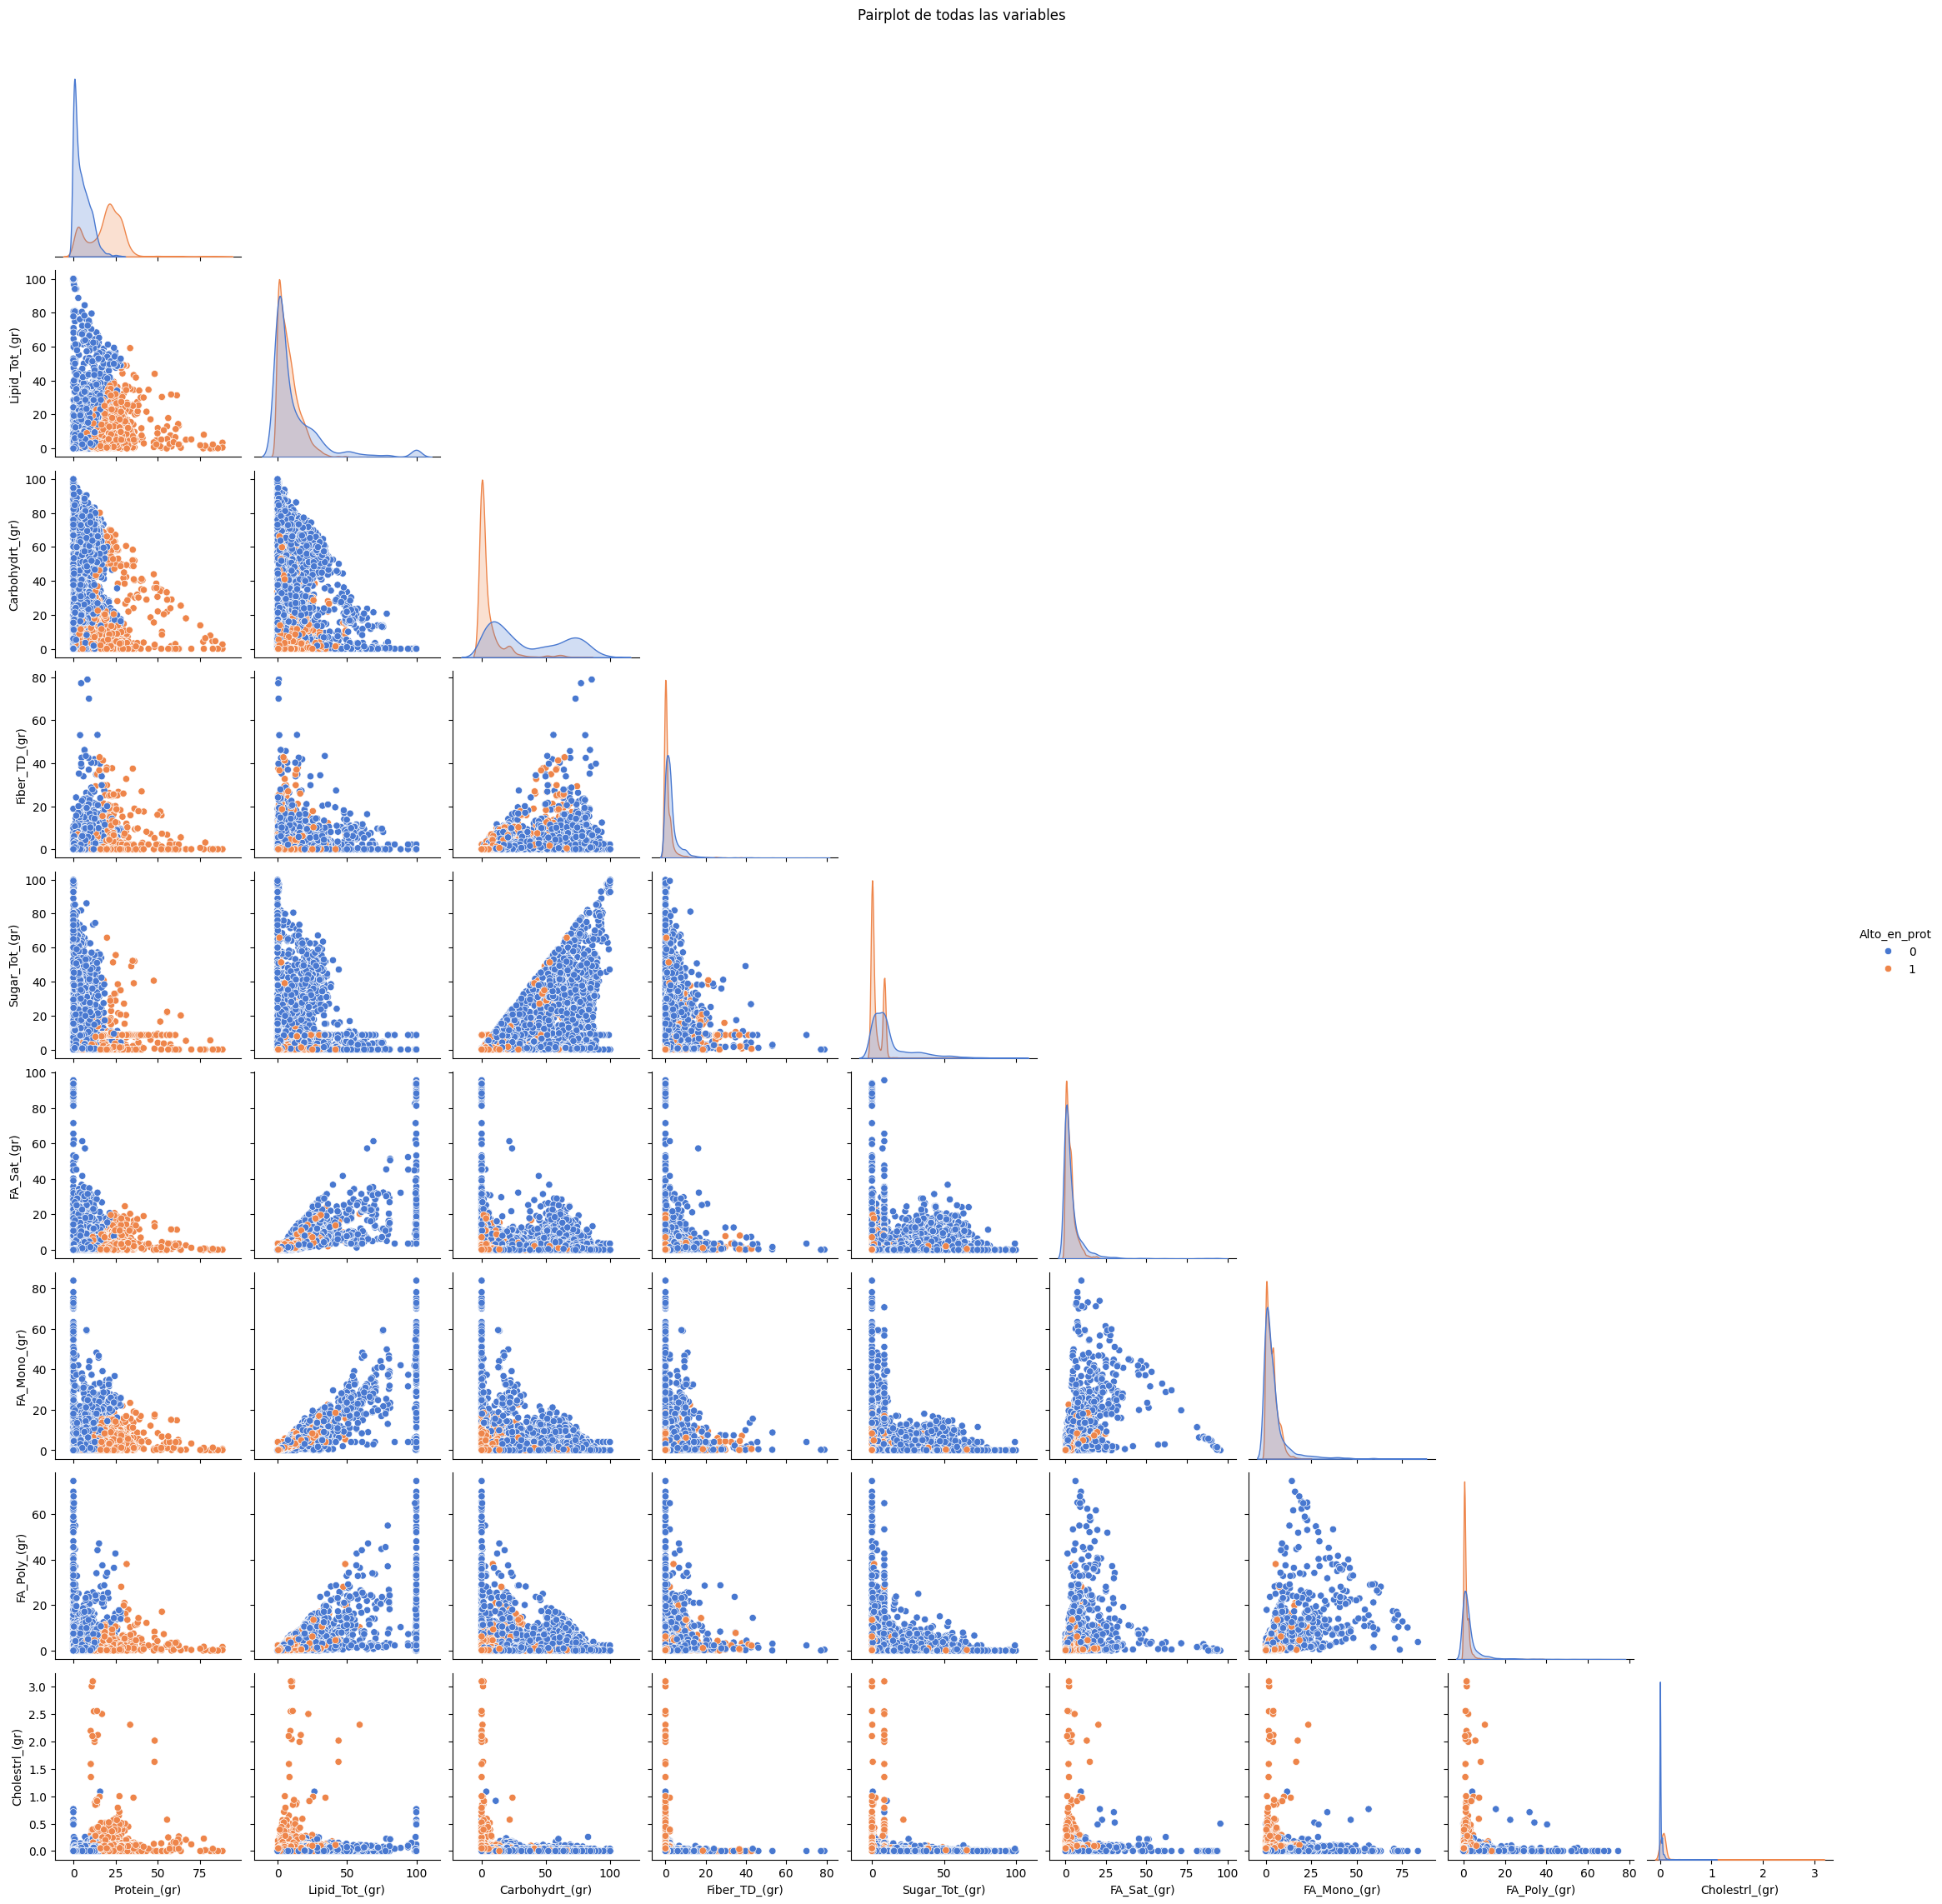

In [86]:
variables = ['Protein_(gr)', 'Lipid_Tot_(gr)',
       'Carbohydrt_(gr)', 'Fiber_TD_(gr)', 'Sugar_Tot_(gr)', 'FA_Sat_(gr)',
       'FA_Mono_(gr)', 'FA_Poly_(gr)', 'Cholestrl_(gr)']

# Crear el pairplot
sns.pairplot(df[variables + ['Alto_en_prot']], hue='Alto_en_prot', palette='muted', diag_kind='kde', corner=True)

# Mostrar el gráfico
plt.suptitle('Pairplot de todas las variables', y=1.02)
plt.show()

**Cuarta pregunta**

¿Cuales son las correlaciones entre diferentes valores nutricionales?

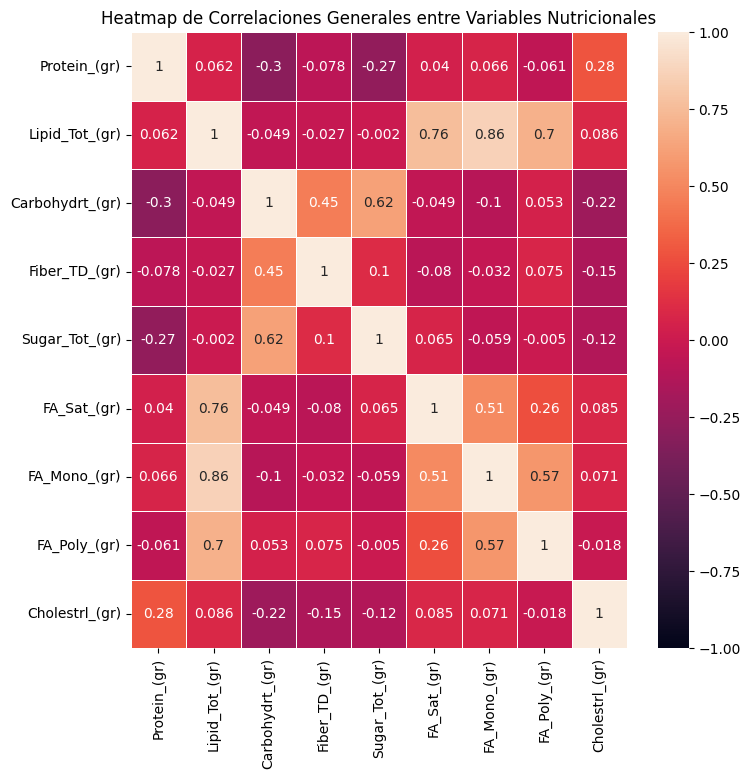

In [87]:
variables_relevantes = ['Protein_(gr)', 'Lipid_Tot_(gr)',
       'Carbohydrt_(gr)', 'Fiber_TD_(gr)', 'Sugar_Tot_(gr)', 'FA_Sat_(gr)',
       'FA_Mono_(gr)', 'FA_Poly_(gr)', 'Cholestrl_(gr)']

df_relevantes = df[variables_relevantes]

#Matriz de correlación
correlation_matrix = df_relevantes.corr().round(3)

#Creamos el heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True,  vmin=-1, vmax=1, linewidths=0.5)

plt.title('Heatmap de Correlaciones Generales entre Variables Nutricionales')
plt.show()



Podemos observar que las variables mas correlativas son:

La fibra con los carbohidratos y las grasas saturadas con las monosaturadas.

La fibra con los carbohidratos es algo que ya estuve relacionando en la cuarta pregunta, lo cual me gustaria seguir investigando el porque de esto y si hay mas variables que influyen en esta relación.
En cuanto a la relacion de las grasas saturadas con las monosaturadas, se debe a que las grasas saturadas y grasas monoinsaturadas son químicamente similares en el sentido de que ambas son tipos de ácidos grasos que contienen solo un enlace simple en su cadena principal de carbono, aunque las grasas monoinsaturadas tienen un único enlace doble.
Dejo foto de refencia:

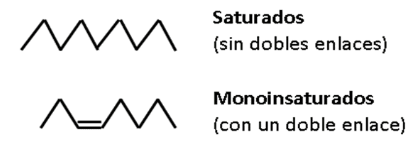


In [88]:
df_numerico = df.select_dtypes(include=['number'])

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


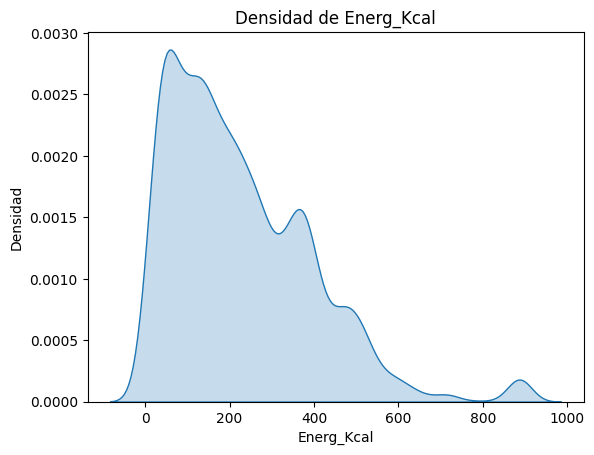

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


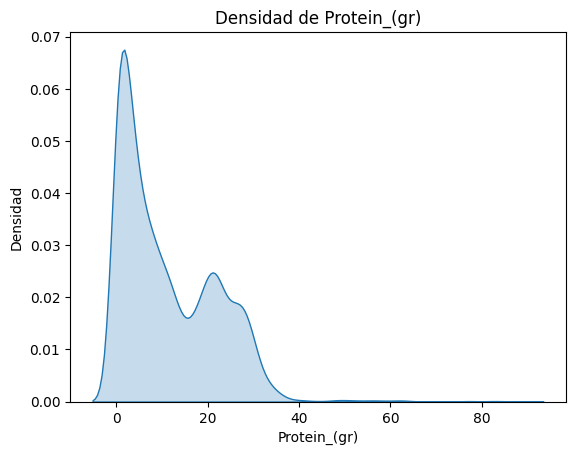

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


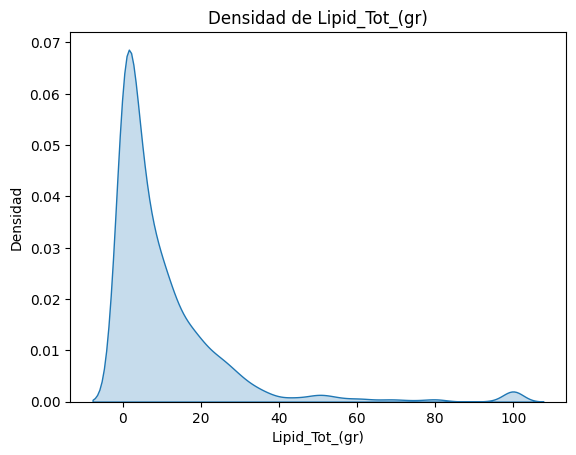

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


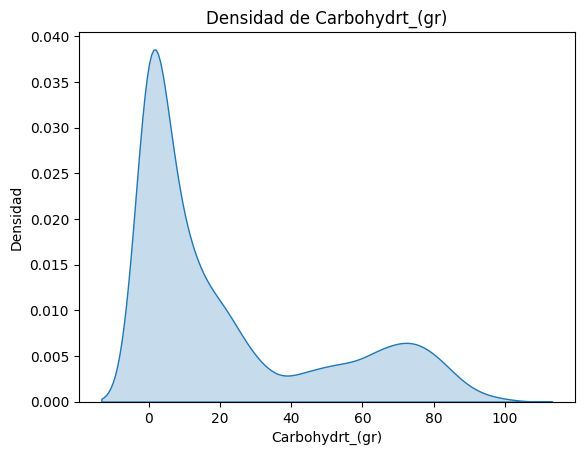

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


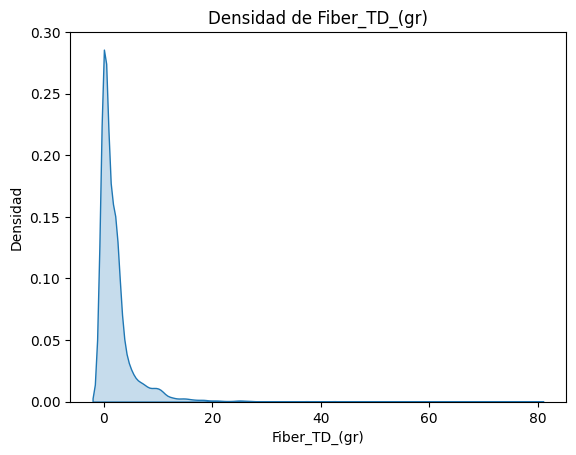

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


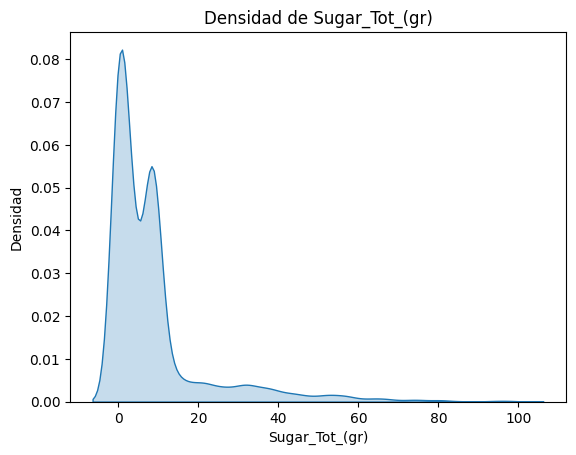

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


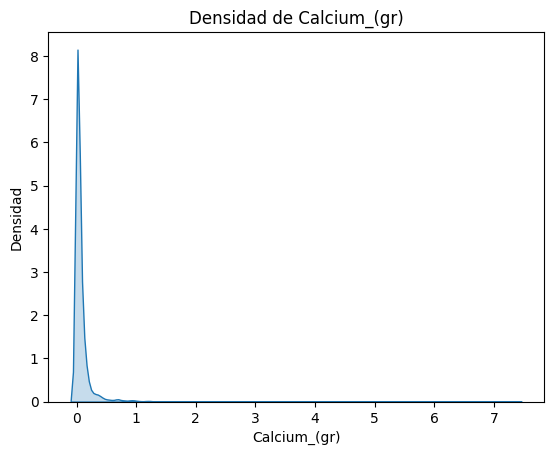

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


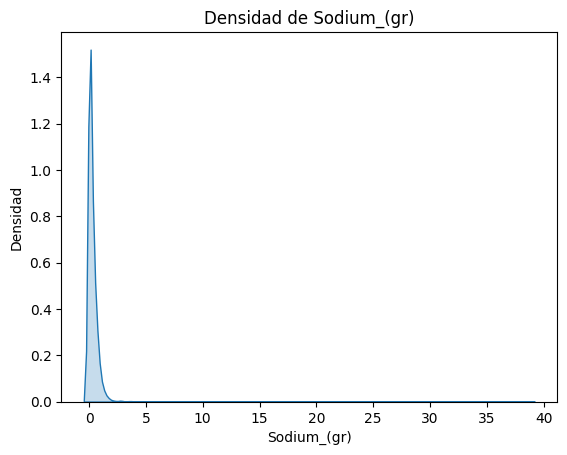

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


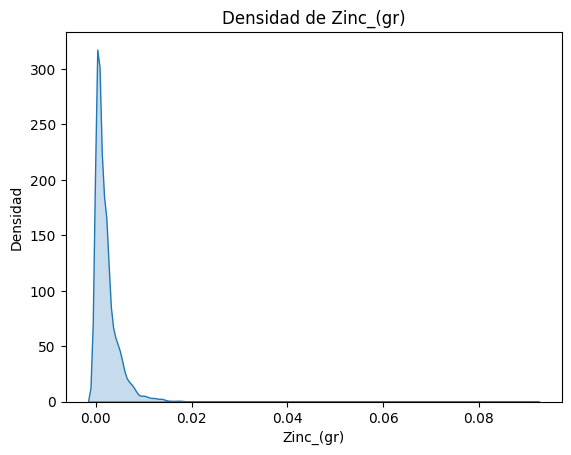

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


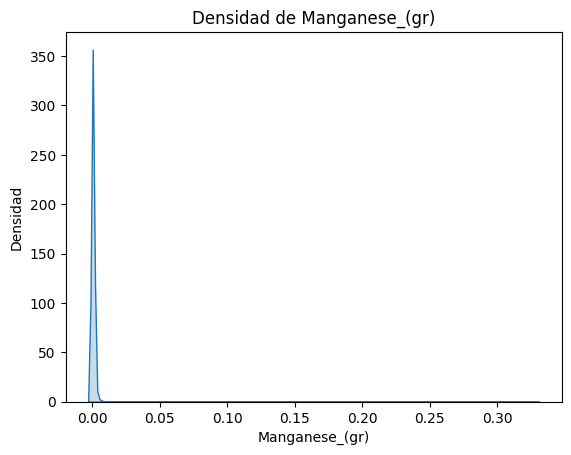

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


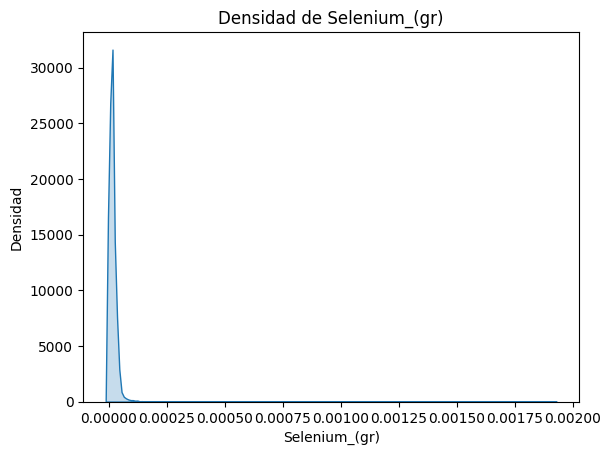

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


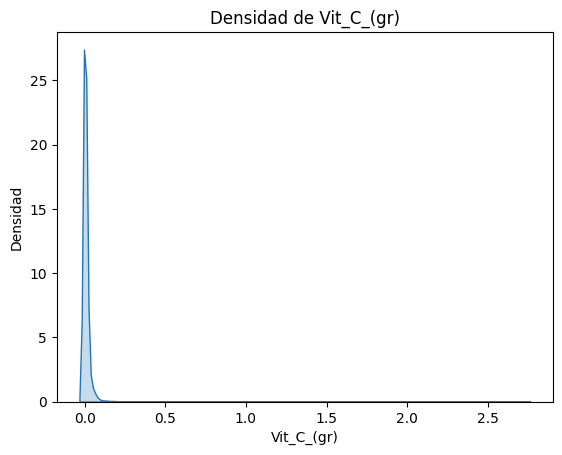

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


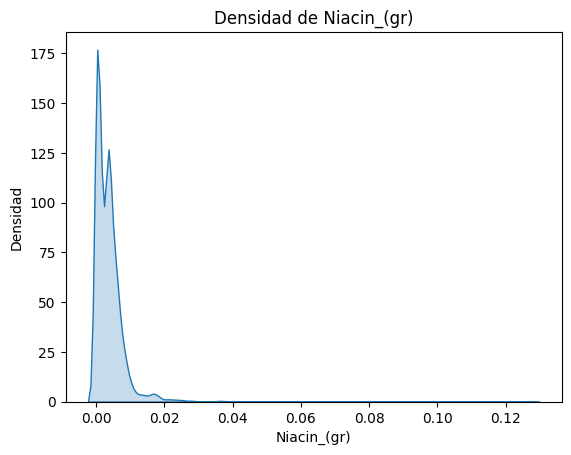

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


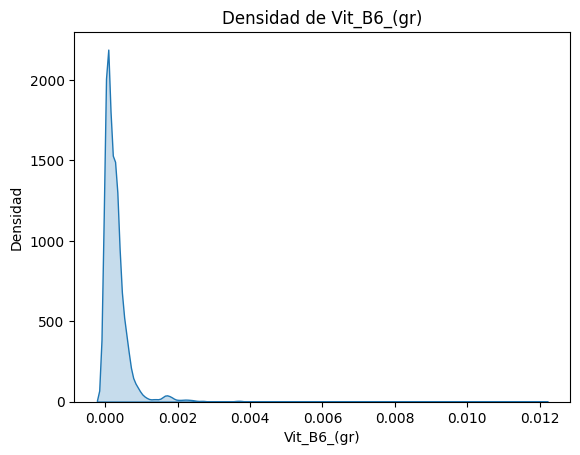

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


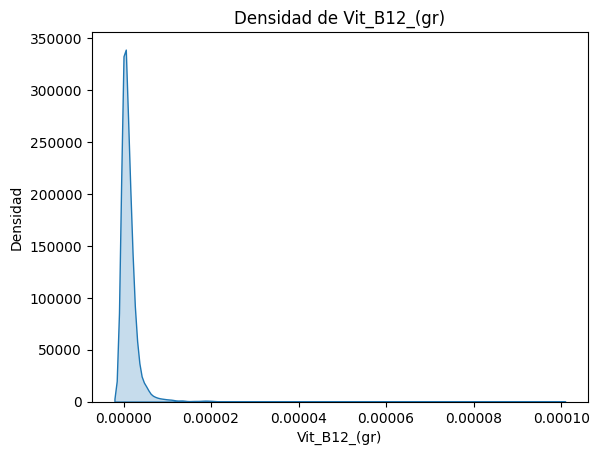

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


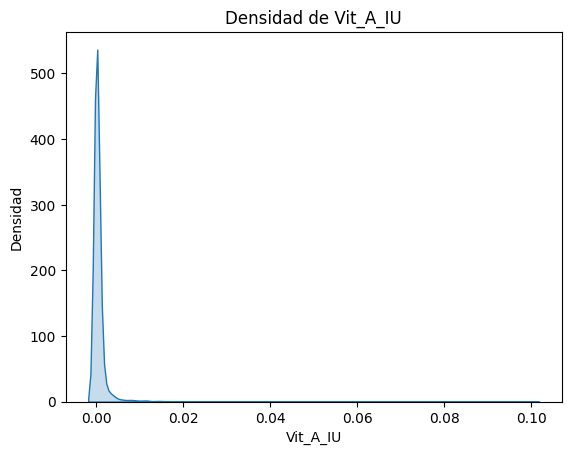

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


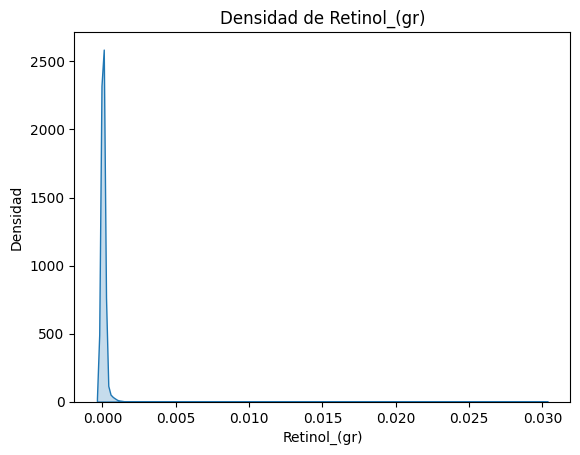

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


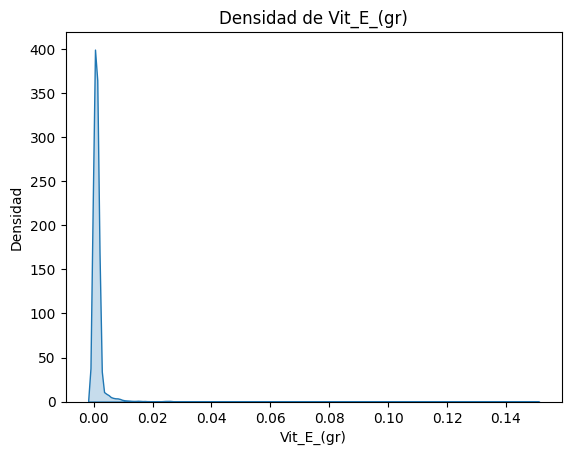

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


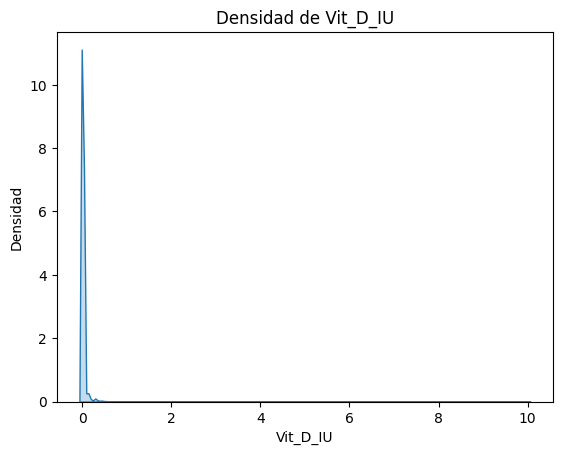

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


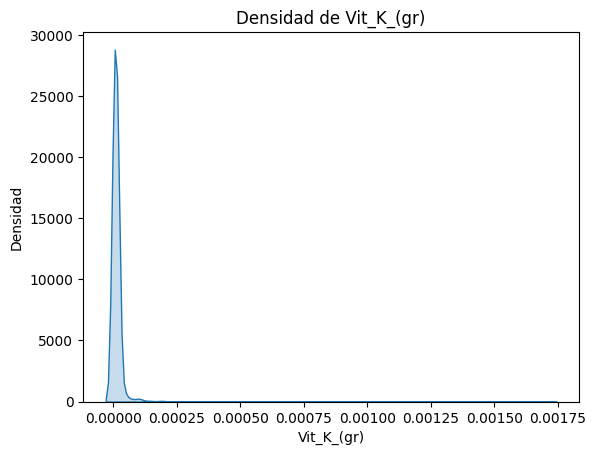

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


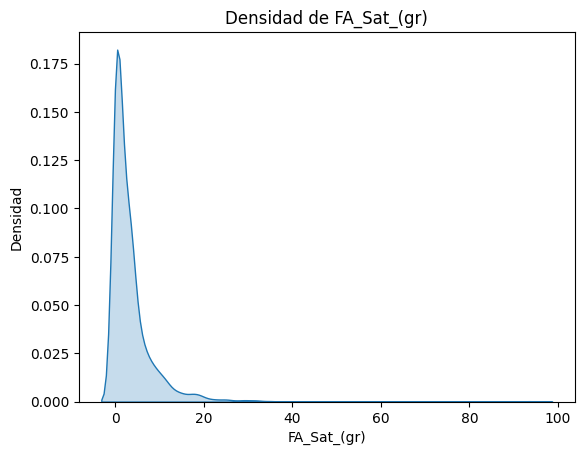

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


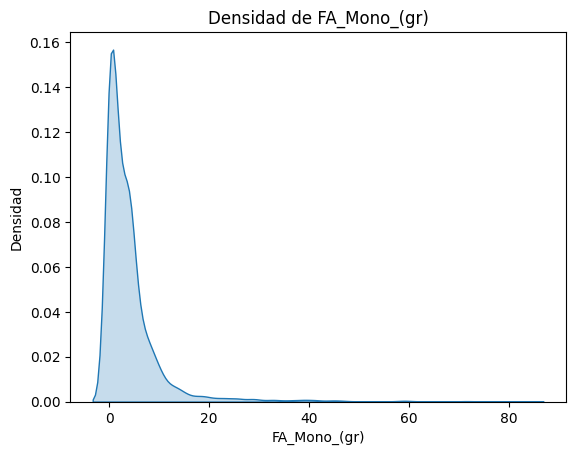

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


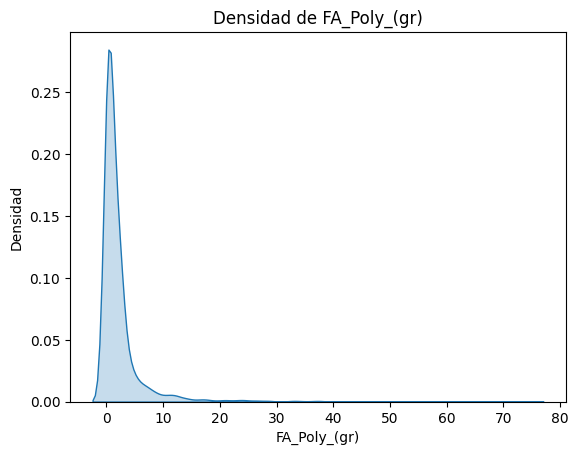

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


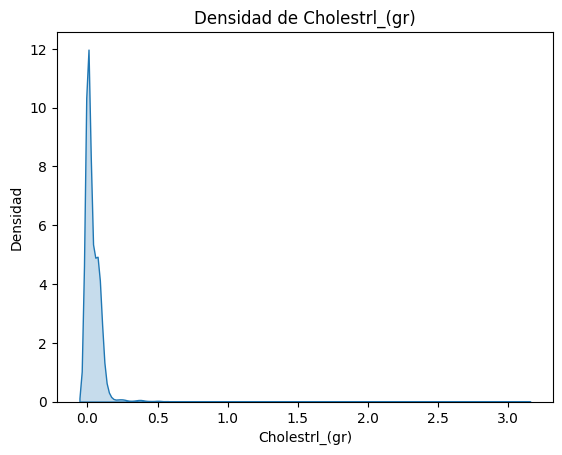

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


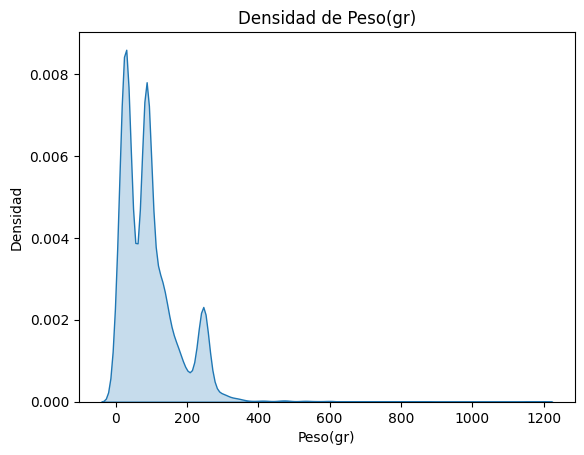

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


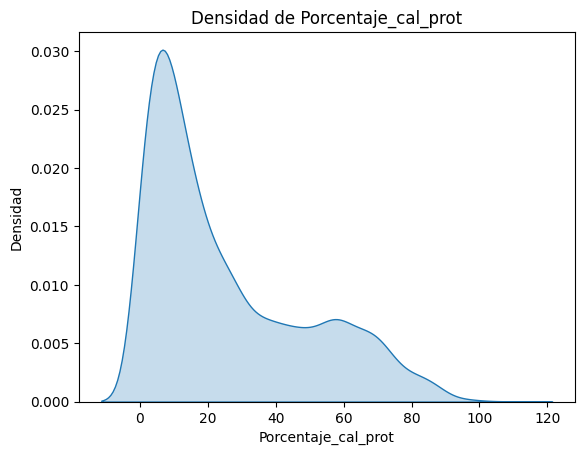

<ipython-input-89-722b8c5ddc14>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numerico[column], shade=True)


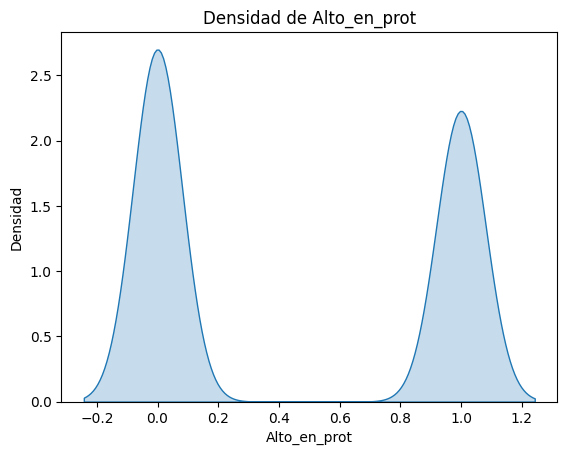

In [89]:
# Iterar sobre cada columna numérica
for column in df_numerico.columns:
    sns.kdeplot(df_numerico[column], shade=True)
    plt.title(f'Densidad de {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Densidad')
    plt.show()

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


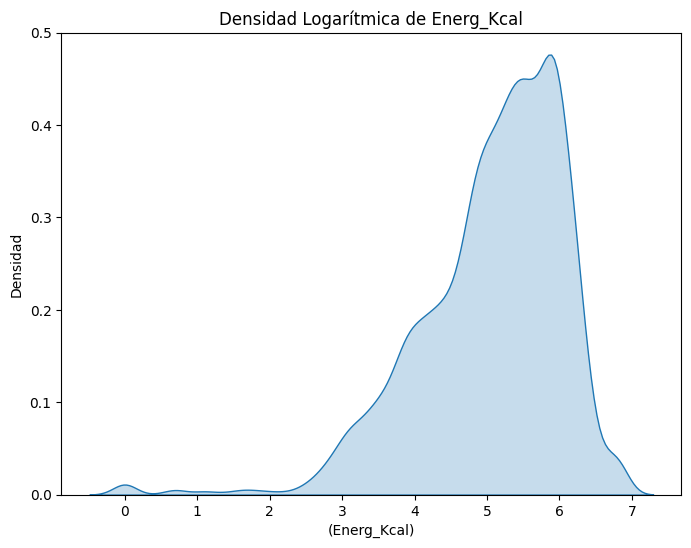

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


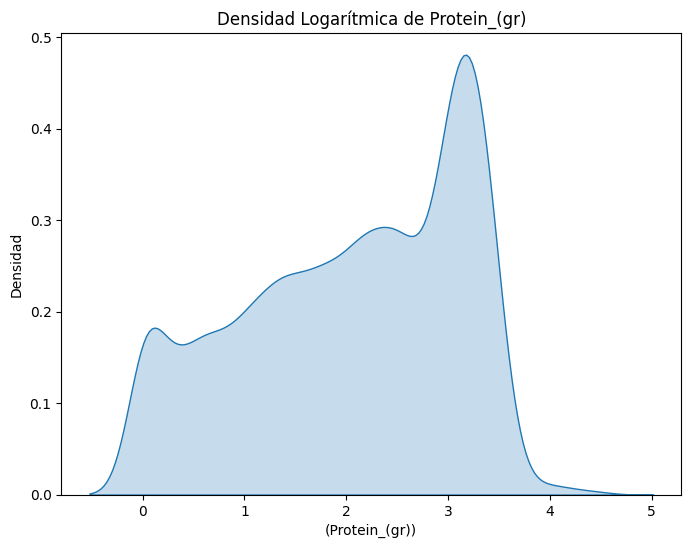

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


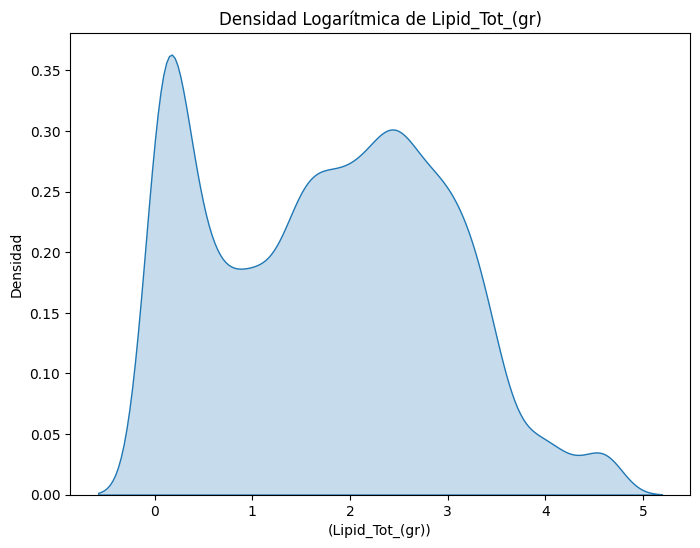

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


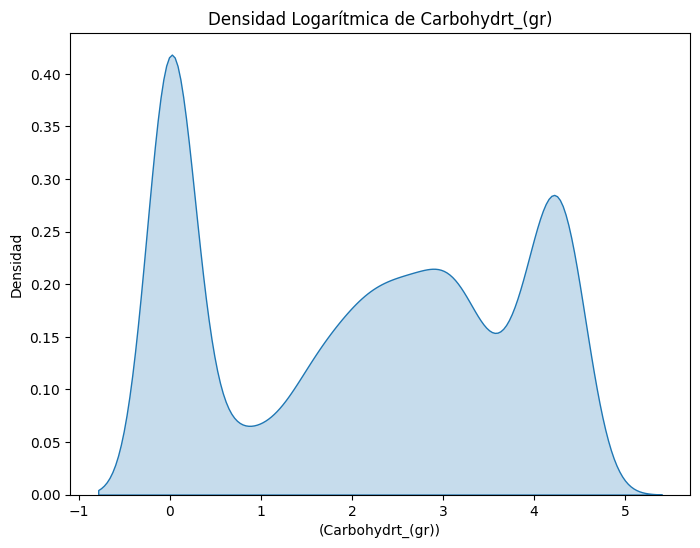

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


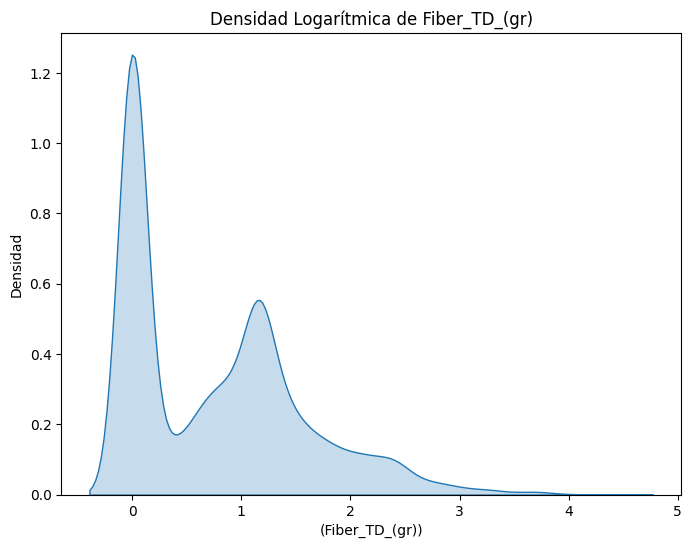

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


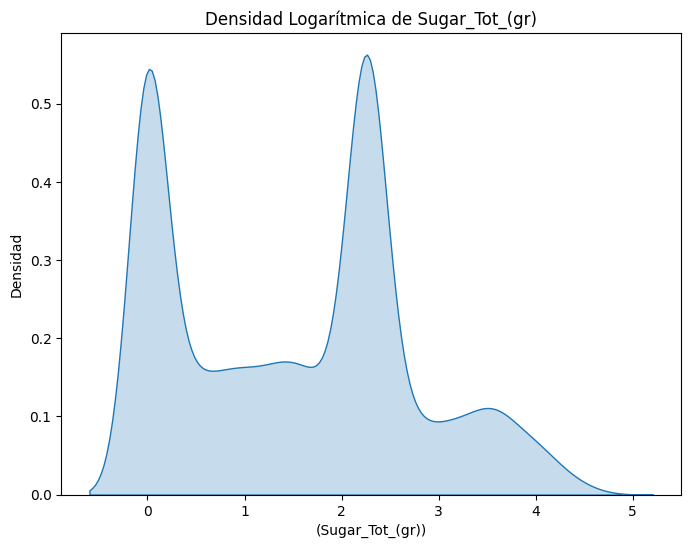

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


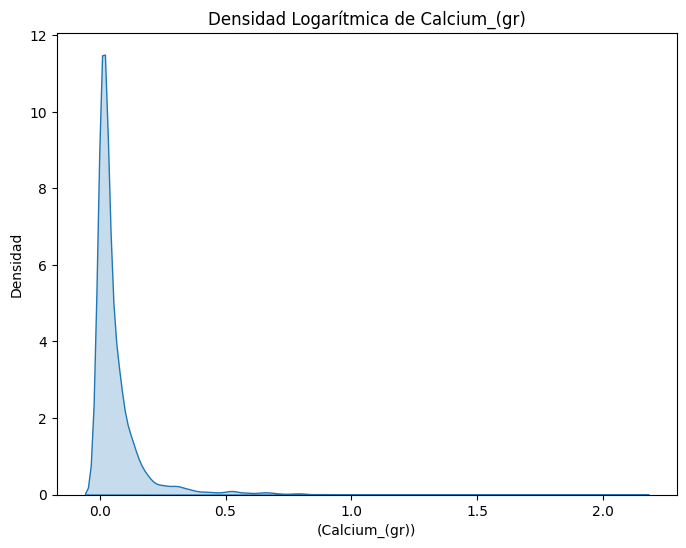

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


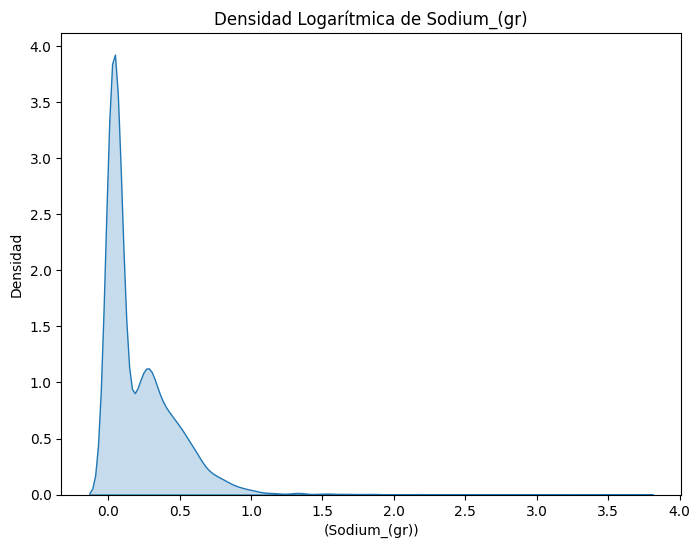

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


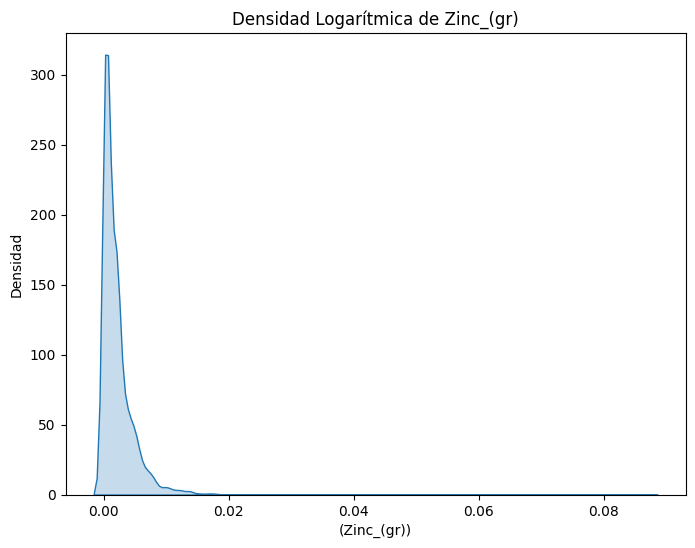

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


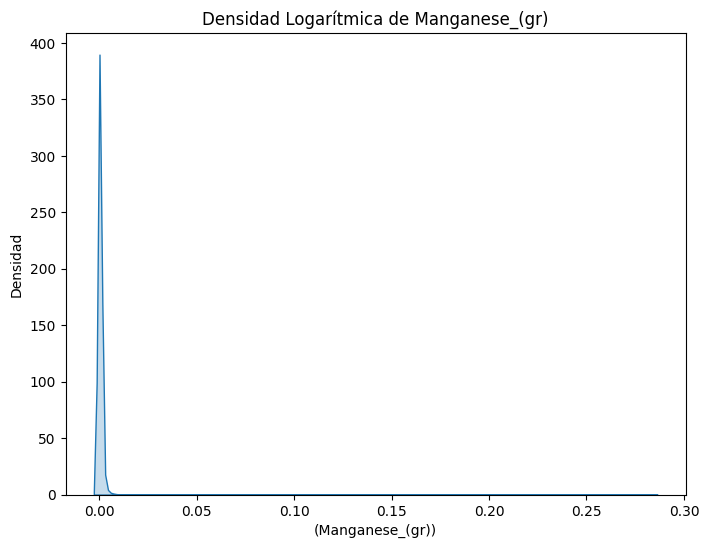

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


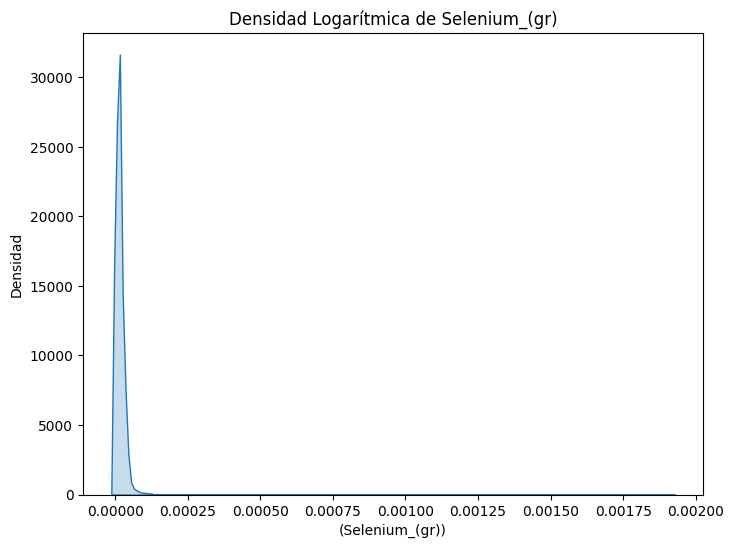

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


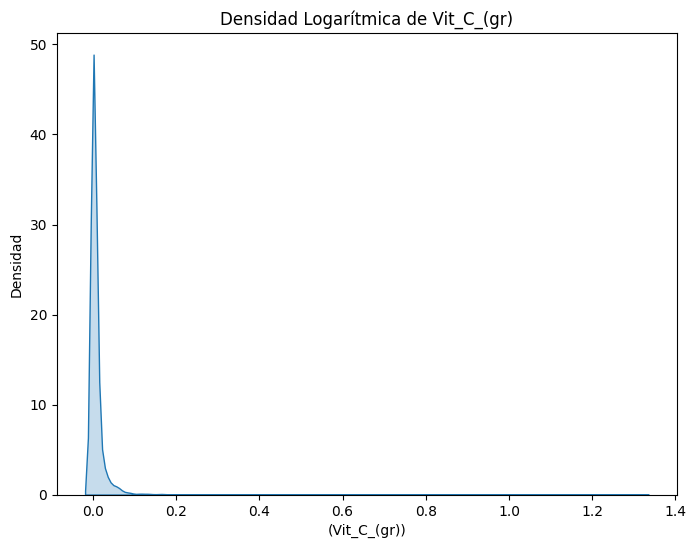

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


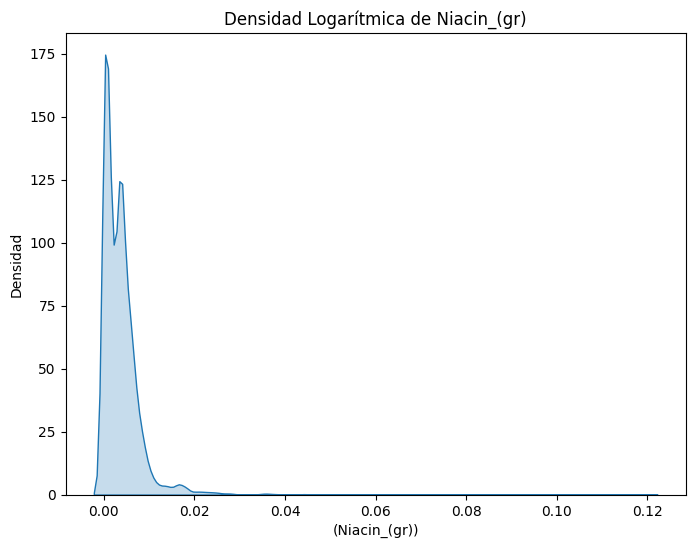

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


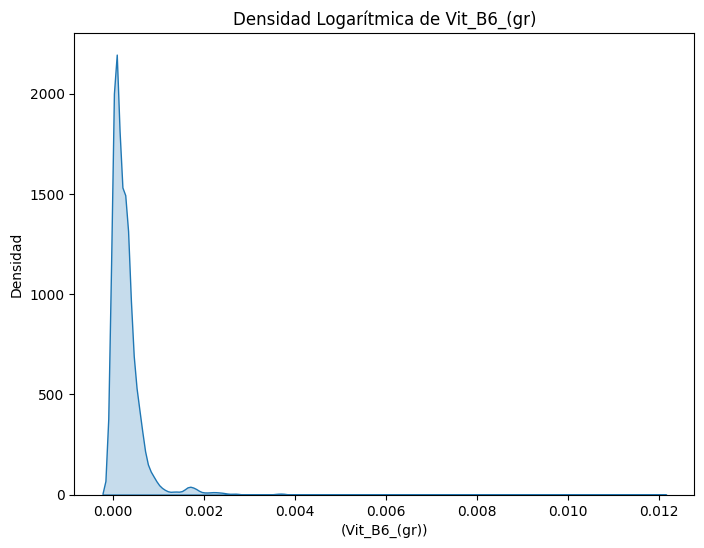

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


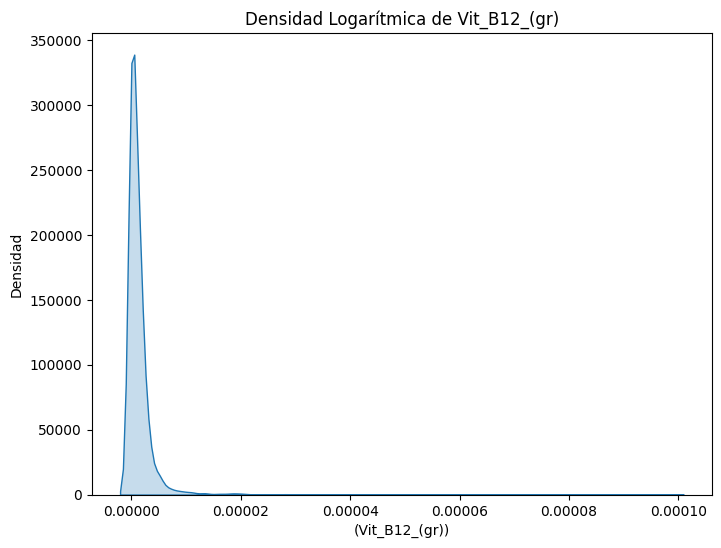

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


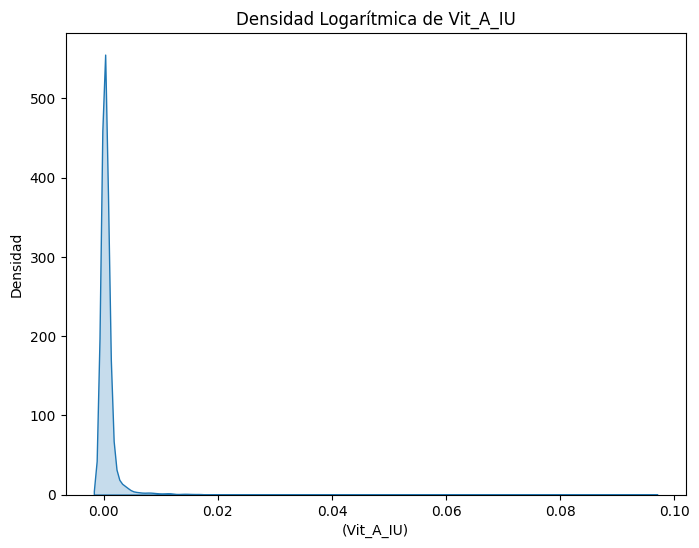

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


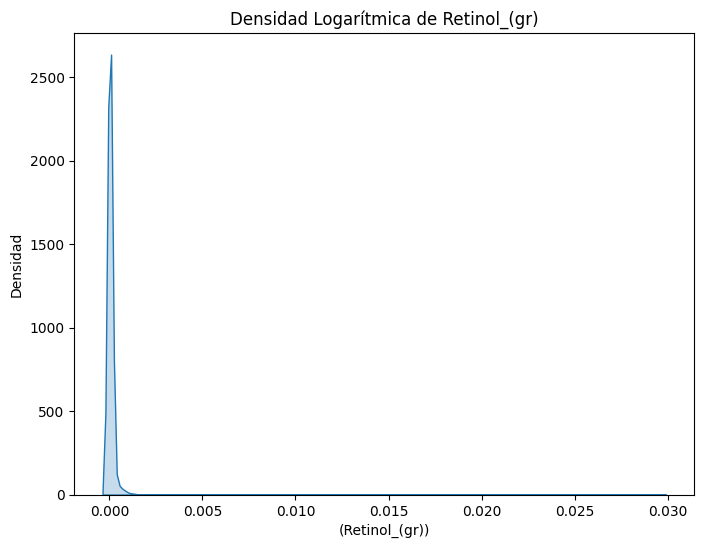

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


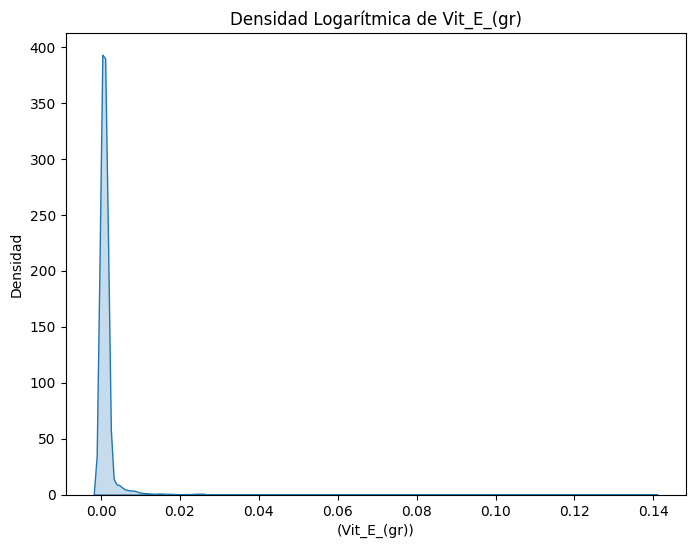

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


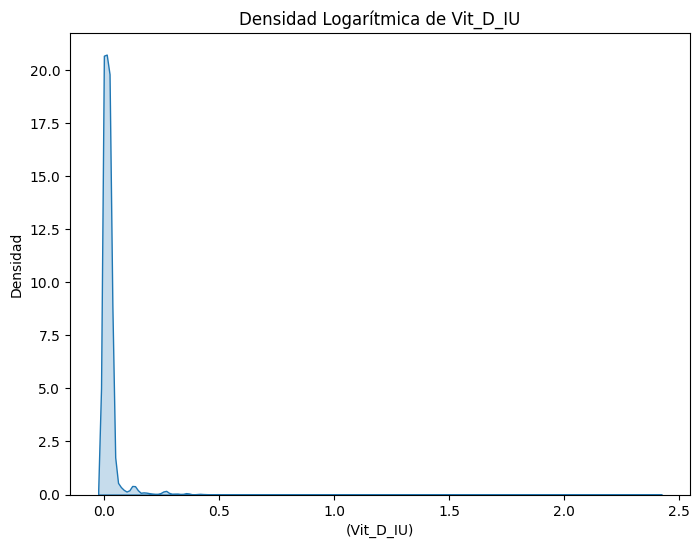

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


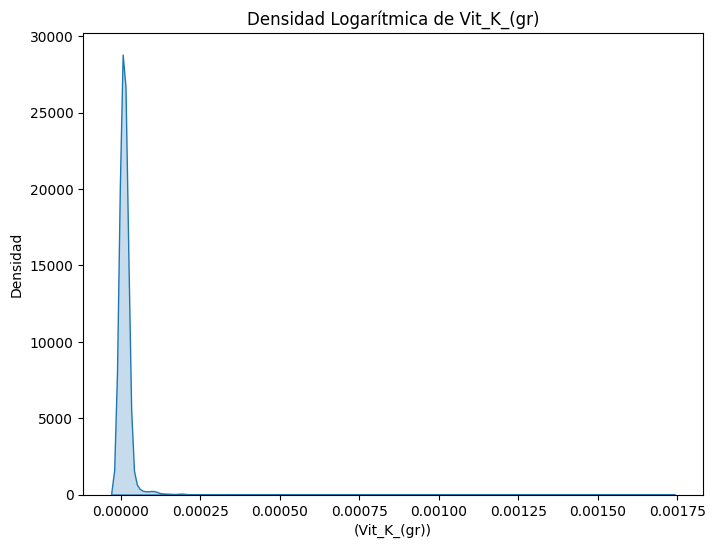

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


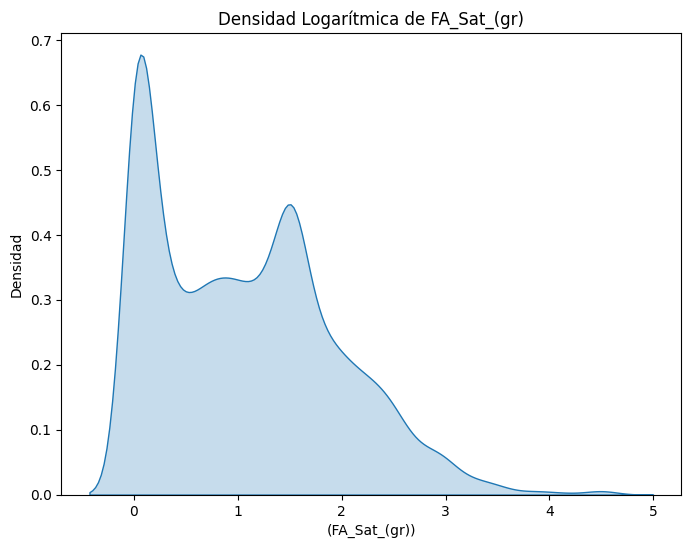

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


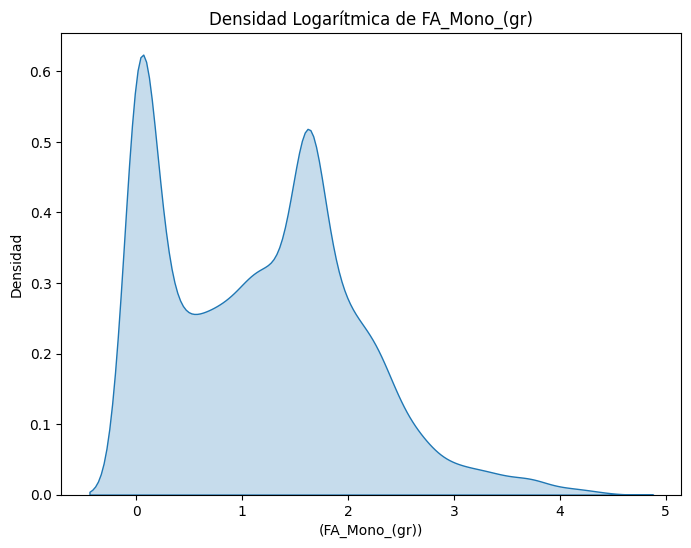

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


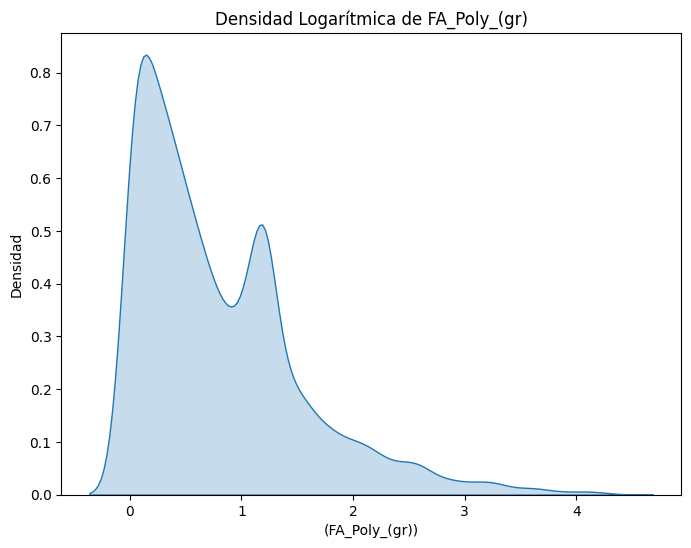

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


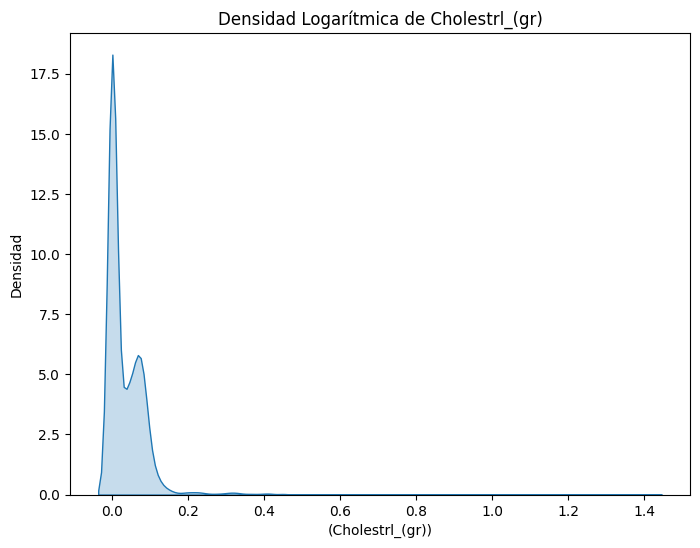

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


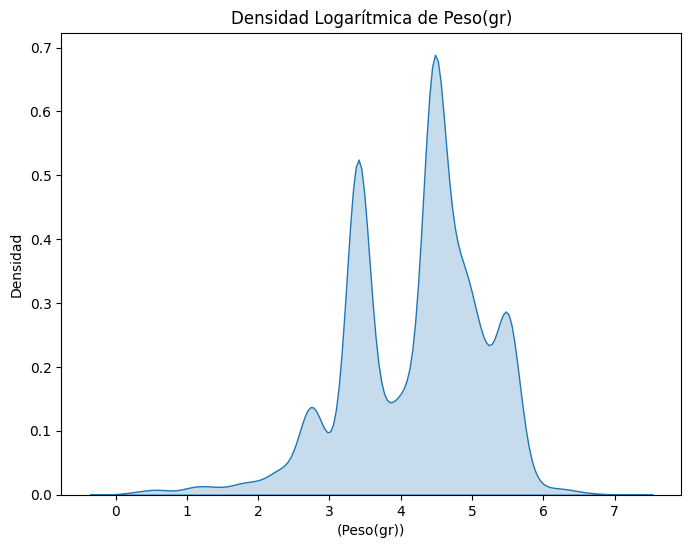

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


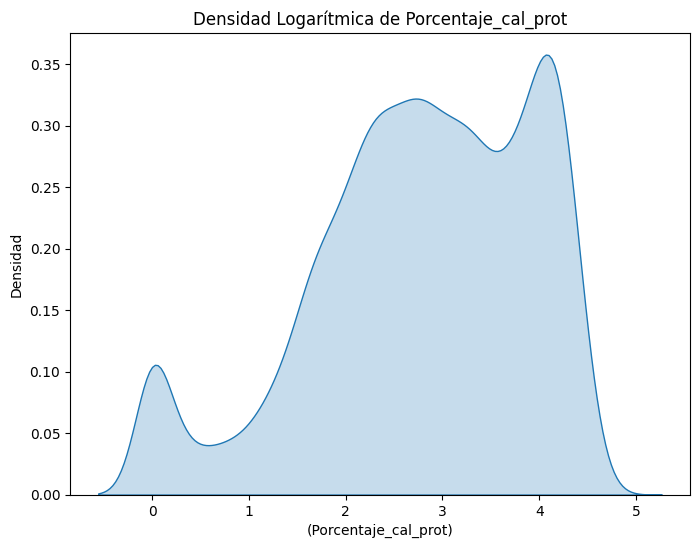

<ipython-input-90-c693ad740e1c>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_data, shade=True)


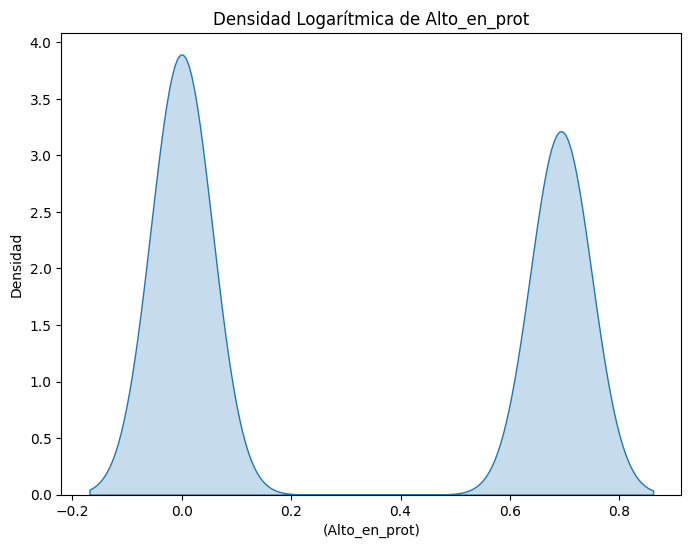

In [90]:
# Iterar sobre cada columna numérica
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Aplicar transformación logarítmica (agregando 1 para evitar log(0))
    log_data = np.log1p(df[column])

    # Graficar la densidad en escala logarítmica
    plt.figure(figsize=(8, 6))
    sns.kdeplot(log_data, shade=True)
    plt.title(f'Densidad Logarítmica de {column}')
    plt.xlabel(f'({column})')
    plt.ylabel('Densidad')
    plt.show()


Le apliqué una transformación logarítmica para "comprimir" los valores grandes y expandir los valores pequeños, lo que facilita visualizar las relaciones entre los datos más uniformemente.

# Modelado


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score

X = df_numerico.drop(columns=['Alto_en_prot', 'Porcentaje_cal_prot', 'Protein_(gr)'])
y = df_numerico['Alto_en_prot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

standarizator = StandardScaler()

X_train = standarizator.fit_transform(X_train)
X_test = standarizator.fit_transform(X_test)

## Modelo KNN

K = 1 | Accuracy = 0.9169510807736063
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       969
           1       0.90      0.92      0.91       789

    accuracy                           0.92      1758
   macro avg       0.92      0.92      0.92      1758
weighted avg       0.92      0.92      0.92      1758

K = 3 | Accuracy = 0.9175199089874858
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       969
           1       0.91      0.91      0.91       789

    accuracy                           0.92      1758
   macro avg       0.92      0.92      0.92      1758
weighted avg       0.92      0.92      0.92      1758

K = 5 | Accuracy = 0.9129692832764505
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       969
           1       0.91      0.90      0.90       789

    accuracy                           0.91      1758
   macro avg  

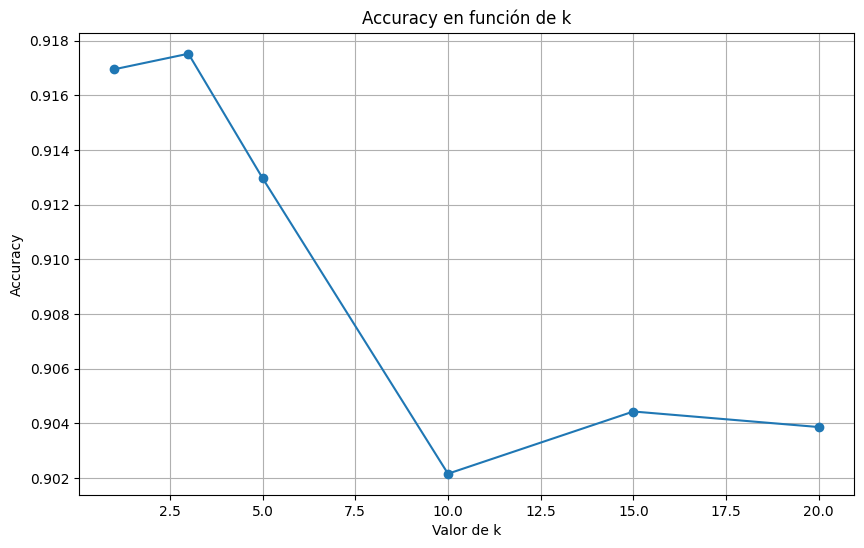

In [104]:
# Lista de valores de k
k_values = [1, 3, 5, 10, 15, 20]

# Diccionario para almacenar resultados
results = {}

# Iterar sobre los valores de k
for k in k_values:
    # Entrenar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy
    print(f"K = {k} | Accuracy = {accuracy}")
    print(classification_report(y_test, y_pred))


# Visualizar los resultados en una gráfica
plt.figure(figsize=(10,6))
plt.plot(k_values, [results[k] for k in k_values], marker='o')
plt.title('Accuracy en función de k')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##Modelo Regresión logistica

In [106]:
#Creamos y entrenamos el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8998862343572241
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       969
           1       0.90      0.88      0.89       789

    accuracy                           0.90      1758
   macro avg       0.90      0.90      0.90      1758
weighted avg       0.90      0.90      0.90      1758



Usamos el accuracy para evaluar los modelos porque nos permite tener una idea clara de su rendimiento general en la clasificación de los datos, especialmente cuando las clases están balanceadas.

##Validación cruzada

In [110]:
# Validación cruzada de KNN para diferentes valores de k
k_values = [1, 3, 5, 10, 15, 20]
knn_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Realizar validación cruzada con 5 folds
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    knn_scores[k] = np.mean(scores)  # Guardar la media de las puntuaciones
    print(f"K = {k} | Accuracy promedio: {np.mean(scores)}")

# Validación cruzada para regresión logística
logreg = LogisticRegression(max_iter=3000)

# Realizar validación cruzada con 5 folds
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f"Regresión Logística | Accuracy promedio: {np.mean(logreg_scores)}")

# Comparar resultados
print("\nResultados finales:")
for k in k_values:
    print(f"KNN (k={k}): {knn_scores[k]}")
print(f"Regresión Logística: {np.mean(logreg_scores)}")

K = 1 | Accuracy promedio: 0.8071672354948806
K = 3 | Accuracy promedio: 0.798179749715586
K = 5 | Accuracy promedio: 0.7995449374288965
K = 10 | Accuracy promedio: 0.8063708759954494
K = 15 | Accuracy promedio: 0.8043230944254836
K = 20 | Accuracy promedio: 0.8055745164960182
Regresión Logística | Accuracy promedio: 0.8947667804323094

Resultados finales:
KNN (k=1): 0.8071672354948806
KNN (k=3): 0.798179749715586
KNN (k=5): 0.7995449374288965
KNN (k=10): 0.8063708759954494
KNN (k=15): 0.8043230944254836
KNN (k=20): 0.8055745164960182
Regresión Logística: 0.8947667804323094


# Reduccion de dimensionalidad con PCA

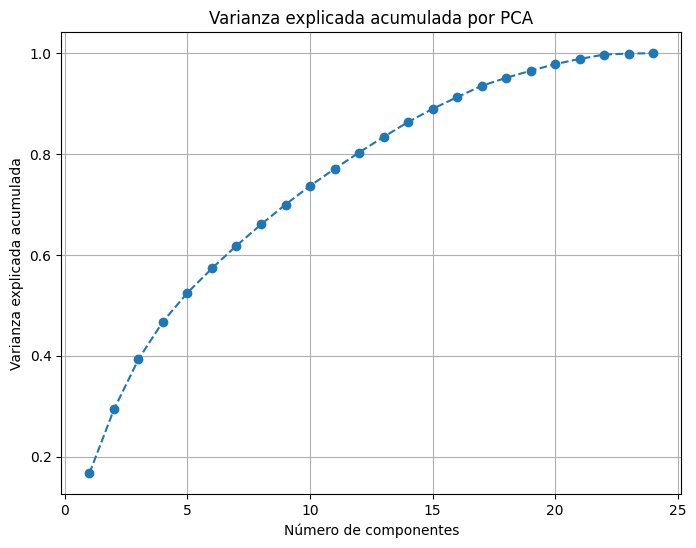

Número de componentes que explican el 95% de la varianza: 18


In [111]:
from sklearn.decomposition import PCA

#Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicaos PCA
pca = PCA(n_components=None)  # n_components=None asegura que se conserven todas las componentes inicialmente
X_pca = pca.fit_transform(X_scaled)

#Visualizamos la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

#Graficar el porcentaje de varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

#Elegir el número de componentes principales (ejemplo: 95% de varianza explicada)
pca_n = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca_n = pca_n.fit_transform(X_scaled)

# Ver cuántas componentes se conservaron
print(f"Número de componentes que explican el 95% de la varianza: {pca_n.n_components_}")


In [116]:
# Obtener los componentes principales con PCA ajustado (en este caso con 18 componentes)
pca_n = PCA(n_components=18)
X_pca_n = pca_n.fit_transform(X_scaled)

# Mostrar las primeras filas del DataFrame
print(componentes_principales.head())


              Energ_Kcal  Lipid_Tot_(gr)  Carbohydrt_(gr)  Fiber_TD_(gr)  \
Componente 1    0.453709        0.442950         0.129052       0.088636   
Componente 2   -0.068444       -0.201762         0.118841       0.142196   
Componente 3    0.124634       -0.147470         0.485971       0.335826   
Componente 4   -0.034246        0.007403        -0.206685      -0.095625   
Componente 5   -0.171211        0.041658        -0.261817       0.228280   

              Sugar_Tot_(gr)  Calcium_(gr)  Sodium_(gr)  Zinc_(gr)  \
Componente 1        0.097677      0.092049     0.030910   0.100231   
Componente 2        0.056781      0.134815     0.012089   0.266303   
Componente 3        0.351349      0.216443     0.070879  -0.007719   
Componente 4       -0.243958     -0.031972    -0.014230   0.396263   
Componente 5       -0.388535      0.149366    -0.056492  -0.022761   

              Manganese_(gr)  Selenium_(gr)  ...  Vit_A_IU  Retinol_(gr)  \
Componente 1        0.057344       0.049125  .

Ahora entrenamos nuevamente mis modelos con la dimensionalidad reducida

Resultados KNN con PCA:
K = 1 | Accuracy: 0.9209328782707622
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       969
           1       0.91      0.92      0.91       789

    accuracy                           0.92      1758
   macro avg       0.92      0.92      0.92      1758
weighted avg       0.92      0.92      0.92      1758

K = 3 | Accuracy: 0.9175199089874858
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       969
           1       0.90      0.91      0.91       789

    accuracy                           0.92      1758
   macro avg       0.92      0.92      0.92      1758
weighted avg       0.92      0.92      0.92      1758

K = 5 | Accuracy: 0.9129692832764505
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       969
           1       0.92      0.89      0.90       789

    accuracy                           0.91    

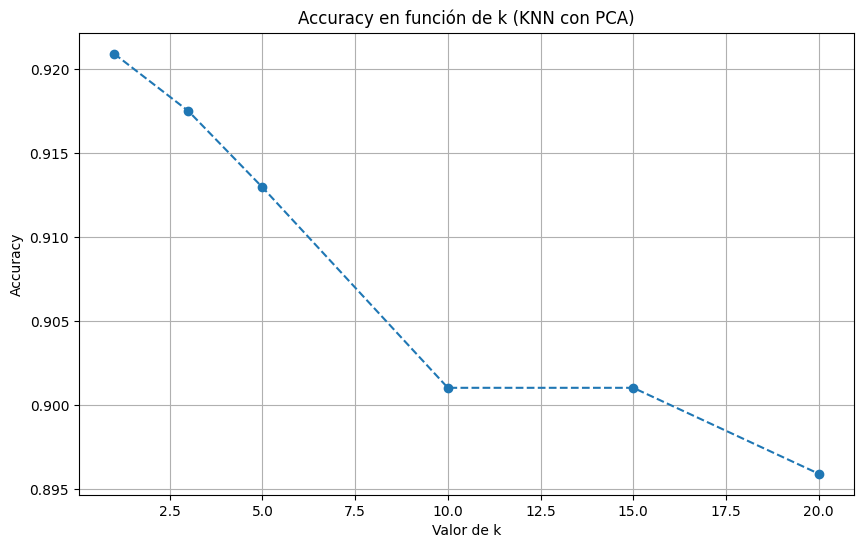

In [117]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_n, y, test_size=0.2, random_state=42)

# Lista de valores de k para KNN
k_values = [1, 3, 5, 10, 15, 20]
knn_scores = {}

print("Resultados KNN con PCA:")

# Iterar sobre los valores de k
for k in k_values:
    # Entrenar el modelo KNN con los componentes principales
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)

    # Hacer predicciones y evaluar el modelo
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    knn_scores[k] = accuracy
    print(f"K = {k} | Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Visualizar los resultados de KNN
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_values, [knn_scores[k] for k in k_values], marker='o', linestyle='--')
plt.title('Accuracy en función de k (KNN con PCA)')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [118]:
# Entrenar y evaluar Regresión Logística con los componentes principales
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_pca, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_logreg = logreg.predict(X_test_pca)

# Evaluar el rendimiento
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Regresión Logística con PCA): {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))


Accuracy (Regresión Logística con PCA): 0.8265073947667805
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       969
           1       0.82      0.78      0.80       789

    accuracy                           0.83      1758
   macro avg       0.83      0.82      0.82      1758
weighted avg       0.83      0.83      0.83      1758



In [119]:
# Paso 1: Validación cruzada para KNN
k_values = [1, 3, 5, 10, 15, 20]
knn_scores = {}

print("Validación cruzada para KNN:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Validación cruzada con 5 folds
    scores = cross_val_score(knn, X_pca_n, y, cv=5, scoring='accuracy')
    knn_scores[k] = np.mean(scores)
    print(f"K = {k} | Accuracy promedio: {np.mean(scores)}")

# Paso 2: Validación cruzada para Regresión Logística
logreg = LogisticRegression(max_iter=1000)

# Validación cruzada con 5 folds
logreg_scores = cross_val_score(logreg, X_pca_n, y, cv=5, scoring='accuracy')
print(f"\nValidación cruzada para Regresión Logística | Accuracy promedio: {np.mean(logreg_scores)}")

# Comparación de resultados
print("\nResultados finales:")
for k in k_values:
    print(f"KNN (k={k}): {knn_scores[k]}")
print(f"Regresión Logística: {np.mean(logreg_scores)}")

Validación cruzada para KNN:
K = 1 | Accuracy promedio: 0.8354948805460751
K = 3 | Accuracy promedio: 0.8375426621160409
K = 5 | Accuracy promedio: 0.8358361774744028
K = 10 | Accuracy promedio: 0.838566552901024
K = 15 | Accuracy promedio: 0.8268486916951081
K = 20 | Accuracy promedio: 0.8257110352673493

Validación cruzada para Regresión Logística | Accuracy promedio: 0.8035267349260524

Resultados finales:
KNN (k=1): 0.8354948805460751
KNN (k=3): 0.8375426621160409
KNN (k=5): 0.8358361774744028
KNN (k=10): 0.838566552901024
KNN (k=15): 0.8268486916951081
KNN (k=20): 0.8257110352673493
Regresión Logística: 0.8035267349260524


## Antes de la reducción de dimensionalidad:
Los modelos KNN y Regresión Logística los evalue utilizando validación cruzada con 5 folds. Para KNN, se probaron diferentes valores de k, y los resultados mostraron que el mejor desempeño lo obtuvo KNN con k=1 con un accuracy promedio de 80.7%, mientras que el resto de valores de k se mantuvieron cercanos a este resultado, con ligeras fluctuaciones. Lo cual no quiere decir que sea un buen resultado del modelo KNN ya que con K = 1, el modelo simplemente toma el vecino más cercano para hacer una predicción, esto no es bueno ya que cualquier valor atípico en los datos puede influir mucho en la predicción final, lo que reduce la capacidad del modelo para generalizar correctamente a datos nuevos.
Por otro lado, el modelo de Regresión Logística presentó un accuracy promedio de 89.5%, superando al modelo KNN. Esto quiere decir que la Regresión Logística es más efectiva cuando se utilizan todas las características disponibles en el dataset.

## Después de la reducción de dimensionalidad con PCA:
Se redujo el número de características a 18 componentes principales, los cuales explicaban el 95% de la varianza del conjunto de datos. Tras esta reducción, se volvió a entrenar y evaluar ambos modelos. Para KNN, el mejor resultado fue con k=10, alcanzando un accuracy promedio de 83.8%, lo que representa una mejora respecto a los resultados previos, especialmente con valores intermedios de k. Sin embargo, en el caso de la Regresión Logística, el rendimiento disminuyó significativamente, con un accuracy promedio de 80.4%.


#Conclusión

En este trabajo se compararon dos modelos de clasificación, **K-Nearest Neighbors (KNN) y Regresión Logística**, antes y después de aplicar una reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA). Los resultados obtenidos permiten extraer conclusiones sobre el impacto de la reducción de dimensionalidad en el rendimiento de ambos modelos.

**Conclusiones:**
La reducción de dimensionalidad mediante PCA permitió una mejora en el rendimiento del modelo KNN, especialmente para valores de k más altos, lo que sugiere que este algoritmo se benefició de la simplificación de los datos. Por el contrario, el modelo de Regresión Logística mostró una disminución en su accuracy tras la reducción dimensional, lo que indica que la Regresión Logística puede aprovechar mejor un conjunto completo de características, mientras que la reducción de dimensionalidad puede hacerle perder información relevante.

En resumen, KNN mostró un mejor rendimiento tras la reducción de dimensionalidad, mientras que Regresión Logística fue más efectiva cuando se utilizaron todas las características originales.